<a href="https://colab.research.google.com/github/chandan110791/diarization_imp/blob/main/Embedding_Attempt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install and Config

# #Install and Config

In [ ]:
# ===== HARD RESET HF STACK (keep torch/pyannote/numpy as-is) =====
import sys, subprocess, pkgutil

def sh(cmd):
    print(">>>", cmd)
    return subprocess.check_call(cmd, shell=True)

print("Removing HF packages that commonly drift...")
sh("pip -q uninstall -y transformers tokenizers safetensors huggingface_hub accelerate peft optimum bitsandbytes")

print("Installing a mutually compatible pinned HF stack...")
# This set is known to work together:
# transformers 4.42.4 requires huggingface-hub < 1.0
sh("""pip -q install --no-cache-dir --force-reinstall \
  "huggingface_hub==0.23.4" \
  "tokenizers==0.19.1" \
  "safetensors==0.4.3" \
  "accelerate==0.31.0" \
  "transformers==4.42.4"
""")

print("Sanity check: pip check (should be clean)")
sh("pip -q check || true")




Removing HF packages that commonly drift...
>>> pip -q uninstall -y transformers tokenizers safetensors huggingface_hub accelerate peft optimum bitsandbytes
Installing a mutually compatible pinned HF stack...
>>> pip -q install --no-cache-dir --force-reinstall   "huggingface_hub==0.23.4"   "tokenizers==0.19.1"   "safetensors==0.4.3"   "accelerate==0.31.0"   "transformers==4.42.4"

Sanity check: pip check (should be clean)
>>> pip -q check || true


0

In [ ]:
# --- Fix torchaudio lib mismatch: reinstall torch+torchaudio as a matched pair ---
!pip -q uninstall -y torchaudio torch torchvision

# Install the matched CUDA 12.1 wheels (T4/V100/L4 on Colab)
!pip -q install --no-cache-dir --force-reinstall \
  torch==2.3.1 torchaudio==2.3.1 torchvision==0.18.1 \
  --index-url https://download.pytorch.org/whl/cu121




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 251.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 255.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 195.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 308.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 201.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 343.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 376.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 360.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 356.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 385.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 357.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# --- Fix: force numpy<2.0 (do NOT touch torch/torchaudio) ---
!pip -q uninstall -y numpy
!pip -q install --no-cache-dir --force-reinstall "numpy==1.26.4"

import numpy as np
print("numpy:", np.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 360.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
gradio 5.50.0 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.23.4 which is incompatible.
gradio 5.50.0 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.
pytensor 2.35.1 requires numpy>=2

In [ ]:
import os
print("   ...Installing Pyannote & Helpers...")
if os.path.exists("requirements.txt"):
    # We ignore the torch lines in requirements.txt since we just installed it above
    !grep -v "torch" requirements.txt > temp_reqs.txt
    !pip install -r temp_reqs.txt -q
    !rm temp_reqs.txt
else:
    # Fallback if file missing
    !pip install pyannote.audio==3.3.1 pyannote.metrics==3.2.1 pyannote.core==5.0.0 "numpy<2.0" "sympy==1.12" torch-geometric transformers==4.42.4 -q

# C. Verify
import torch
import pyannote.audio
print(f"✅ Environment Fixed: Torch {torch.__version__} | Pyannote {pyannote.audio.__version__}")

   ...Installing Pyannote & Helpers...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━

# Libraries and variable

In [ ]:
import os, torch, numpy as np
from pyannote.audio import Pipeline, Model
from pyannote.database import get_protocol, FileFinder
from pyannote.metrics.diarization import DiarizationErrorRate
from pyannote.core import Segment, Timeline, Annotation

In [ ]:
# 3. PULL CODE (From Your GitHub)
REPO_URL = "https://github.com/chandan110791/diarization_imp.git"
REPO_DIR = "/content/diarization_imp"

In [ ]:

if not os.path.exists(REPO_DIR):
    print("📥 Cloning Public Repository...")
    !git clone $REPO_URL $REPO_DIR
else:
    print("🔄 Pulling Latest Changes...")
    %cd $REPO_DIR
    !git pull



📥 Cloning Public Repository...
Cloning into '/content/diarization_imp'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 226 (delta 4), reused 15 (delta 2), pack-reused 203 (from 1)
Receiving objects: 100% (226/226), 708.10 MiB | 24.49 MiB/s, done.
Resolving deltas: 100% (68/68), done.
Updating files: 100% (138/138), done.


In [ ]:
# 4. INSTALL DEPENDENCIES
# 4. ROBUST DEPENDENCY INSTALL (The "Clean Slate" Fix)
print("🔧 Configuring Environment...")
%cd $REPO_DIR

🔧 Configuring Environment...
/content/diarization_imp


In [ ]:
# DAILY SETUP: Mounts Drive, Unzips Data, Pulls Code, Installs Deps
import shutil
from google.colab import drive, userdata

print("🚀 INITIALIZING DAILY WORKFLOW...")

# 1. MOUNT DRIVE (To access your Zipped Data)
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')


🚀 INITIALIZING DAILY WORKFLOW...
Mounted at /content/drive


In [ ]:

# 5. AUTHENTICATE HUGGING FACE (Required for WavLM download)
try:
    from google.colab import userdata
    os.environ["HF_TOKEN"] = userdata.get('hf_token')
    print("✅ Hugging Face Token Loaded.")
except:
    print("⚠️ HF_TOKEN not found in Secrets! Please add it in the sidebar.")

print("\n✨ SYSTEM READY. You can now run '!python src/train.py'")

✅ Hugging Face Token Loaded.

✨ SYSTEM READY. You can now run '!python src/train.py'


In [ ]:
%env PYANNOTE_DATABASE_CONFIG=$(pwd)/database.yml

env: PYANNOTE_DATABASE_CONFIG=$(pwd)/database.yml


In [ ]:
import os
from pathlib import Path
from pyannote.database import registry, get_protocol, FileFinder

DATABASE_YML = "/content/diarization_imp/database.yml"
os.environ["PYANNOTE_DATABASE_CONFIG"] = str(Path(DATABASE_YML).resolve())

print("[CHK] exists:", Path(DATABASE_YML).exists(), os.environ["PYANNOTE_DATABASE_CONFIG"])

# Force registry load
registry.load_database(os.environ["PYANNOTE_DATABASE_CONFIG"])
print("[CHK] registry.load_database OK")

# Now directly try to load the protocol (this is the real test)
protocol_name = "AMI.SpeakerDiarization.mini"
protocol = get_protocol(protocol_name, preprocessors={"audio": FileFinder()})

# Smoke test: count files
dev_files = list(protocol.development())
test_files = list(protocol.test())
print("[OK] Loaded:", protocol_name)
print("[OK] dev:", len(dev_files), "test:", len(test_files))
print("[OK] dev uris:", [f["uri"] for f in dev_files])

print("[OK] test uris:", [f["uri"] for f in test_files])


[CHK] exists: True /content/diarization_imp/database.yml
'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
[CHK] registry.load_database OK
[OK] Loaded: AMI.SpeakerDiarization.mini
[OK] dev: 5 test: 6
[OK] dev uris: ['TS3010a', 'TS3006a', 'IS1007a', 'ES2005a', 'IS1009a']
[OK] test uris: ['ES2006a', 'TS3009a', 'TS3012a', 'IS1003a', 'ES2003a', 'ES2009a']


In [ ]:
# Convert the notebook to HTML, including both code and output
!NOTEBOOK_FILE=$(ls -1 *.ipynb | head -n 1) && \
  if [ -z "$NOTEBOOK_FILE" ]; then \
    echo "Error: Could not find the current notebook file. Please ensure it is saved and in the current directory." ; \
  else \
    jupyter nbconvert --to html --output colab_notebook.html "$NOTEBOOK_FILE" --output-dir "/content/" ; \
  fi

ls: cannot access '*.ipynb': No such file or directory
Error: Could not find the current notebook file. Please ensure it is saved and in the current directory.


The `colab_notebook.html` file should now be available in your current working directory. You can download it from the file browser on the left sidebar in Colab.

# Functions

In [ ]:
def ref_overlap_timeline(reference: Annotation) -> Timeline:
    # build overlap timeline where >=2 speakers active
    events = []
    for seg, _, _ in reference.itertracks(yield_label=True):
        events.append((seg.start, +1))
        events.append((seg.end, -1))
    events.sort()
    count, prev = 0, None
    olap = []
    for t, d in events:
        if prev is not None and t > prev and count >= 2:
            olap.append(Segment(prev, t))
        count += d
        prev = t
    return Timeline(olap).support()




In [ ]:
def eval_pipeline(pipeline, files, collar=0.25, skip_overlap=False):
    metric = DiarizationErrorRate(collar=collar, skip_overlap=skip_overlap)
    metric_ol = DiarizationErrorRate(collar=collar, skip_overlap=False)

    for f in files:
        ref = f["annotation"]
        uem = f.get("annotated", None)
        hyp = pipeline(f)

        metric(ref, hyp, uem=uem)

        # overlap-only evaluation map
        ol = ref_overlap_timeline(ref)
        if uem is not None:
            # crop overlap to annotated region
            ol = ol.crop(uem)
        if len(ol) > 0:
            metric_ol(ref, hyp, uem=ol)

    out = {
        "DER": abs(metric),
        "FA":  metric["false alarm"],
        "MISS": metric["missed detection"],
        "CONF": metric["confusion"],
        "TOTAL_REF_SPEECH": metric["total"],
        "DER_overlap_only": (abs(metric_ol) if metric_ol["total"] > 0 else float("nan")),
    }
    return out

# Whats going wrong with embeddings for SV

In [ ]:
import os, random, math
import torch, torchaudio


SEED = 0
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

PROTOCOL_NAME = "AMI.SpeakerDiarization.mini"

def get_audio_info(file):
    return torchaudio.info(file["audio"])

def get_annotated(file):
    info = file["torchaudio.info"]
    duration = info.num_frames / info.sample_rate
    return Timeline([Segment(0, duration)])

preprocessors = {
    "audio": FileFinder(),
    "torchaudio.info": get_audio_info,
    "annotated": get_annotated
}

protocol = get_protocol(PROTOCOL_NAME, preprocessors=preprocessors)

def pick_by_uri(split_files, wanted):
    by_uri = {f["uri"]: f for f in split_files}
    out = []
    for u in wanted:
        assert u in by_uri, f"URI {u} not found in this split. Available example: {list(by_uri.keys())[:5]}"
        out.append(by_uri[u])
    return out

DEV_URIS = ["IS1007a", "ES2005a", "TS3006a"]   # your chosen drill-down set
dev_files_all = list(protocol.development())
dev_files = pick_by_uri(dev_files_all, DEV_URIS)

[(f["uri"], f["audio"]) for f in dev_files]

device: cuda


[('IS1007a',
  PosixPath('/content/diarization_imp/data/ami_mini/audio/IS1007a.wav')),
 ('ES2005a',
  PosixPath('/content/diarization_imp/data/ami_mini/audio/ES2005a.wav')),
 ('TS3006a',
  PosixPath('/content/diarization_imp/data/ami_mini/audio/TS3006a.wav'))]

In [ ]:
from transformers import AutoModelForAudioXVector
import torch.nn as nn
import torch.nn.functional as F

SR = 16000
CROP_SEC_LIST = [0.5, 1.0, 2.0, 4.0]  # duration sensitivity test
DEFAULT_CROP = 2.0                    # matches your training :contentReference[oaicite:5]{index=5}

def l2norm(x, eps=1e-9):
    return x / (x.norm(dim=-1, keepdim=True) + eps)

class PretrainedWavLMSV(nn.Module):
    def __init__(self, model_name="microsoft/wavlm-base-plus-sv"):
        super().__init__()
        self.backbone = AutoModelForAudioXVector.from_pretrained(model_name)
        if hasattr(self.backbone, "config"):
            self.backbone.config.output_hidden_states = False
            self.backbone.config.return_dict = True

    @staticmethod
    def _xvec(out):
        for k in ["xvector", "xvectors", "embeddings", "embedding"]:
            if hasattr(out, k):
                v = getattr(out, k)
                if v is not None: return v
        if isinstance(out, (tuple, list)) and len(out) > 0:
            return out[0]
        raise RuntimeError(f"Cannot extract xvector from output type: {type(out)}")

    def forward(self, wavs_16k):
        out = self.backbone(wavs_16k)
        x = self._xvec(out)
        return l2norm(x)

class XVectorEmbedder(nn.Module):
    # mirrors your training code :contentReference[oaicite:6]{index=6}
    def __init__(self, model_name="microsoft/wavlm-base-plus-sv", proj_dim=256):
        super().__init__()
        self.backbone = AutoModelForAudioXVector.from_pretrained(model_name)
        if hasattr(self.backbone, "config"):
            self.backbone.config.output_hidden_states = False
            self.backbone.config.return_dict = True

        with torch.no_grad():
            dummy = torch.zeros(1, SR)
            out = self.backbone(dummy)
            x = PretrainedWavLMSV._xvec(out)
            in_dim = x.shape[-1]

        self.proj = nn.Sequential(
            nn.Linear(in_dim, proj_dim),
            nn.ReLU(),
            nn.Linear(proj_dim, proj_dim),
        )

    def forward(self, wavs_16k):
        out = self.backbone(wavs_16k)
        x = PretrainedWavLMSV._xvec(out)
        z = self.proj(x)
        return l2norm(z)

# --- Load models ---
m_pre = PretrainedWavLMSV().to(device).eval()

# Your CALLHOME-trained checkpoint produced "best.pt" (dict with key "embedder")
# (your script saves embedder.state_dict() into ckpt :contentReference[oaicite:7]{index=7})
CALLHOME_BEST_PT = "/content/drive/MyDrive/microsoft_wavlm_base_plus_svm/best.pt"  # change if needed
ckpt = torch.load(CALLHOME_BEST_PT, map_location="cpu")
m_ft = XVectorEmbedder().to(device).eval()
m_ft.load_state_dict(ckpt["embedder"], strict=True)

print("Loaded pretrained + finetuned ✅")


Some weights of the model checkpoint at microsoft/wavlm-base-plus-sv were not used when initializing WavLMForXVector: ['wavlm.encoder.pos_conv_embed.conv.weight_g', 'wavlm.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMForXVector from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMForXVector from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMForXVector were not initialized from the model checkpoint at microsoft/wavlm-base-plus-sv and are newly initialized: ['wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a d

Loaded pretrained + finetuned ✅


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def read_wav_16k_segment(path, start, dur, target_sec=DEFAULT_CROP):
    info = torchaudio.info(path)
    sr = info.sample_rate
    frame_offset = int(start * sr)
    num_frames = int(dur * sr)
    wav, _ = torchaudio.load(path, frame_offset=frame_offset, num_frames=num_frames)
    wav = wav.mean(dim=0)  # mono

    if sr != SR:
        wav = torchaudio.functional.resample(wav, sr, SR)

    target_len = int(target_sec * SR)
    if len(wav) < target_len:
        wav = F.pad(wav, (0, target_len - len(wav)))
    elif len(wav) > target_len:
        wav = wav[:target_len]

    return wav.unsqueeze(0)  # (1, T)

def speaker_durations_in_window(reference, seg: Segment):
    cropped = reference.crop(seg, mode="intersection")
    d = {}
    for s, _, lab in cropped.itertracks(yield_label=True):
        d[lab] = d.get(lab, 0.0) + s.duration
    return d

def sample_windows(file, win_sec=2.0, n=250, min_dom=0.95):
    # sample uniformly over full annotated timeline
    dur = file["torchaudio.info"].num_frames / file["torchaudio.info"].sample_rate
    ref = file["annotation"]

    clean = []
    overlap = []
    for _ in range(n*3):  # oversample and filter
        t0 = random.uniform(0, max(0.01, dur - win_sec))
        seg = Segment(t0, t0 + win_sec)
        d = speaker_durations_in_window(ref, seg)
        if len(d) == 0:
            continue
        labs = sorted([(v, k) for k, v in d.items()], reverse=True)
        dom_dur, dom_lab = labs[0]
        dom = dom_dur / win_sec
        active = [k for k,v in d.items() if v > 0.05]

        if dom >= min_dom and len(active) == 1:
            clean.append((seg, dom_lab, set(active)))
        elif len(active) >= 2:
            overlap.append((seg, dom_lab, set(active)))

        if len(clean) >= n and len(overlap) >= n:
            break

    return clean[:n], overlap[:n]

@torch.no_grad()
def embed_batch(file, windows, model, crop_sec):
    wavs = []
    labels = []
    spk_sets = []
    for seg, lab, spkset in windows:
        wavs.append(read_wav_16k_segment(file["audio"], seg.start, seg.duration, target_sec=crop_sec))
        labels.append(lab)
        spk_sets.append(spkset)

    wavs = torch.cat(wavs, dim=0).to(device)
    z = model(wavs).float().cpu().numpy()
    return z, labels, spk_sets

def same_diff_stats(Z, y):
    y = np.asarray(y)
    S = Z @ Z.T  # cosine because L2-normalized
    same, diff = [], []
    for i in range(len(y)):
        for j in range(i+1, len(y)):
            (same if y[i]==y[j] else diff).append(S[i,j])
    same = np.asarray(same); diff = np.asarray(diff)
    # Monte-carlo P(same > diff)
    m = min(20000, len(same), len(diff))
    rng = np.random.default_rng(0)
    s_s = rng.choice(same, size=m, replace=(len(same)<m))
    d_s = rng.choice(diff, size=m, replace=(len(diff)<m))
    p = float((s_s > d_s).mean()) if m>0 else float("nan")
    return {
        "same_mean": float(np.mean(same)) if len(same) else float("nan"),
        "diff_mean": float(np.mean(diff)) if len(diff) else float("nan"),
        "gap": float(np.mean(same)-np.mean(diff)) if len(same) and len(diff) else float("nan"),
        "p_same_gt_diff": p,
        "same": same,
        "diff": diff
    }

def plot_hist(same, diff, title):
    plt.figure(figsize=(6,4))
    plt.hist(diff, bins=40, alpha=0.7, label="diff")
    plt.hist(same, bins=40, alpha=0.7, label="same")
    plt.title(title)
    plt.xlabel("cosine"); plt.ylabel("count")
    plt.legend()
    plt.show()

def plot_pca(Z, y, title):
    y_ids = {lab:i for i,lab in enumerate(sorted(set(y)))}
    c = np.array([y_ids[lab] for lab in y])
    Z3 = PCA(n_components=3, random_state=0).fit_transform(Z)
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(Z3[:,0], Z3[:,1], Z3[:,2], s=14, alpha=0.85, c=c)
    ax.set_title(title)
    ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
    plt.show()

def sim1_sim2(clean_Z, clean_y, overlap_Z, overlap_sets):
    # Sim1: clean speaker vs overlap that contains that speaker
    # Sim2: clean speaker vs overlap that does NOT contain that speaker
    sims1, sims2 = [], []
    # build indices of overlap windows per speaker presence
    for i, (zc, spk) in enumerate(zip(clean_Z, clean_y)):
        # find overlap windows that contain spk
        idx_same = [j for j,sset in enumerate(overlap_sets) if spk in sset]
        idx_oth  = [j for j,sset in enumerate(overlap_sets) if spk not in sset]
        if not idx_same or not idx_oth:
            continue
        j1 = random.choice(idx_same)
        j2 = random.choice(idx_oth)
        sims1.append(float(np.dot(zc, overlap_Z[j1])))
        sims2.append(float(np.dot(zc, overlap_Z[j2])))
    return np.array(sims1), np.array(sims2)



URI: IS1007a | crop_sec: 0.5
sampled clean=160 overlap=81 (overlap_rate~0.34)

[pretrained] CLEAN: same_mean=0.4804 diff_mean=0.4174 gap=0.0630  P(same>diff)≈0.596


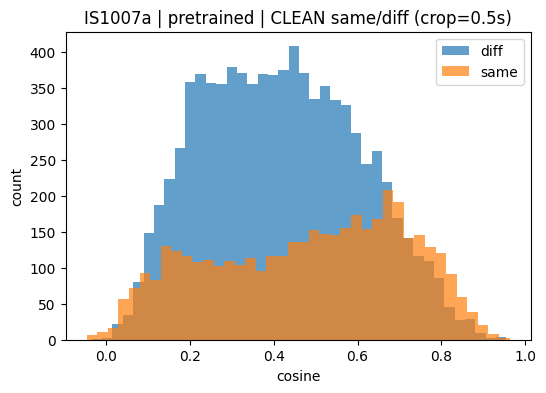

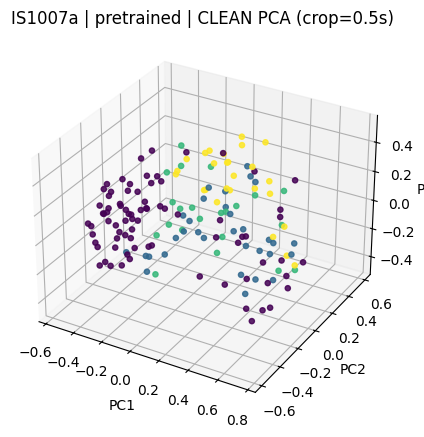

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.446 | Sim2(clean vs overlap-other) mean=0.473 | gap=-0.027


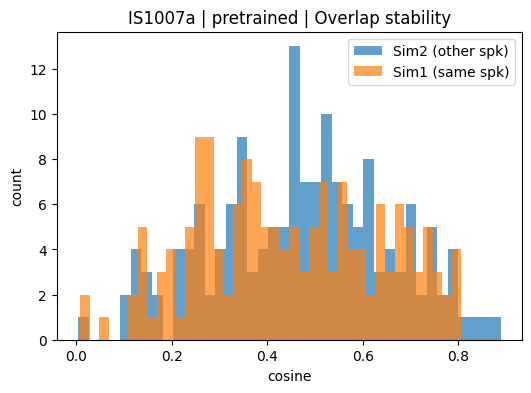


[finetuned_callhome] CLEAN: same_mean=0.7309 diff_mean=0.6895 gap=0.0414  P(same>diff)≈0.580


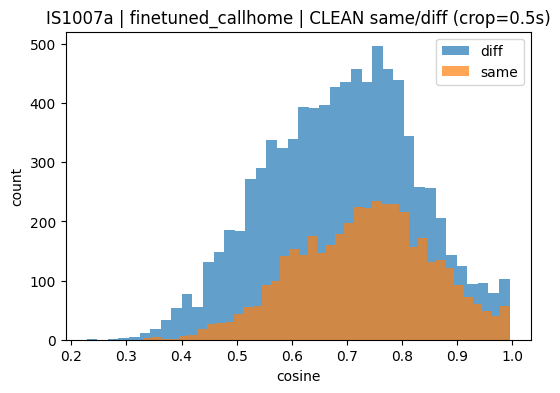

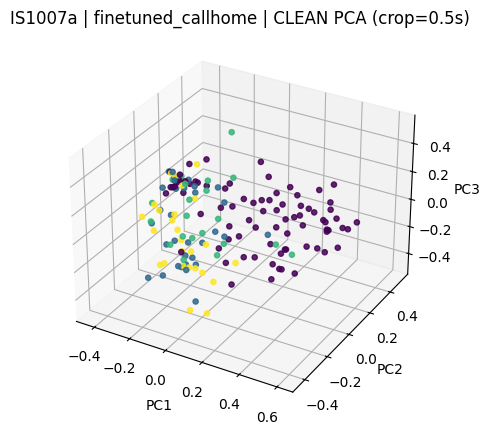

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.711 | Sim2(clean vs overlap-other) mean=0.691 | gap=0.020


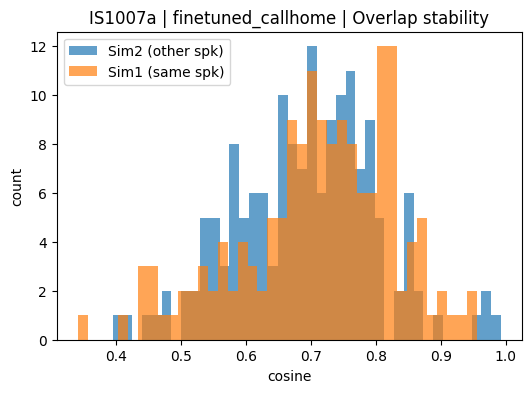


URI: IS1007a | crop_sec: 1.0
sampled clean=160 overlap=96 (overlap_rate~0.37)

[pretrained] CLEAN: same_mean=0.6441 diff_mean=0.5655 gap=0.0786  P(same>diff)≈0.640


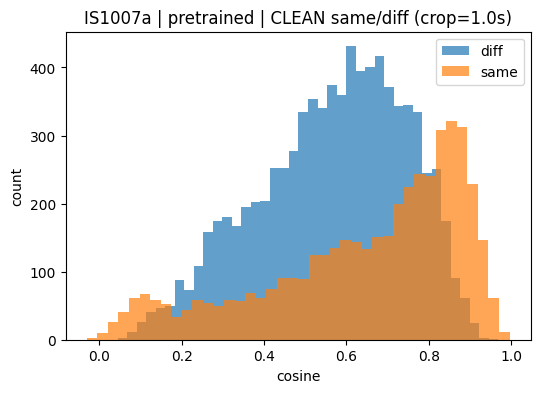

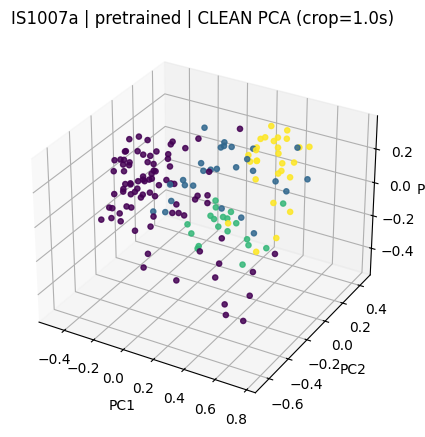

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.633 | Sim2(clean vs overlap-other) mean=0.559 | gap=0.074


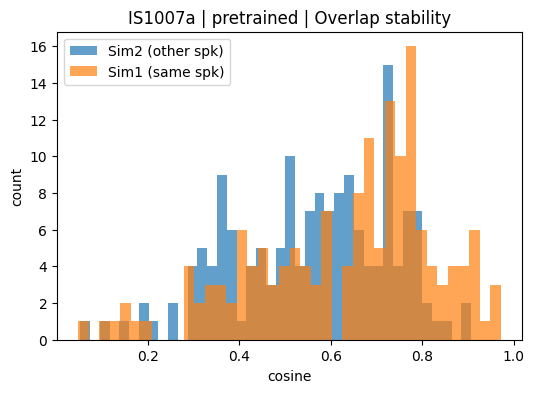


[finetuned_callhome] CLEAN: same_mean=0.7985 diff_mean=0.7281 gap=0.0703  P(same>diff)≈0.679


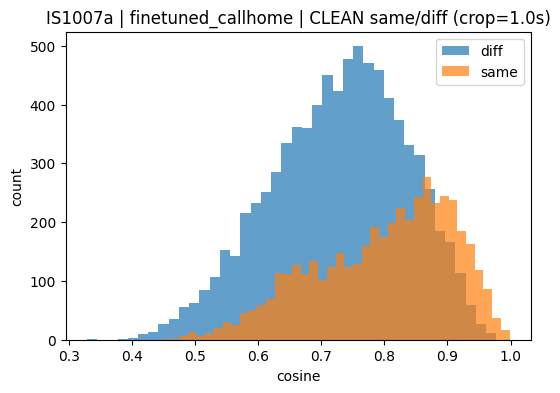

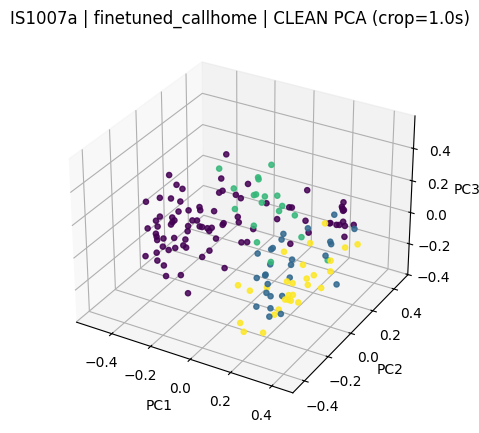

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.779 | Sim2(clean vs overlap-other) mean=0.729 | gap=0.050


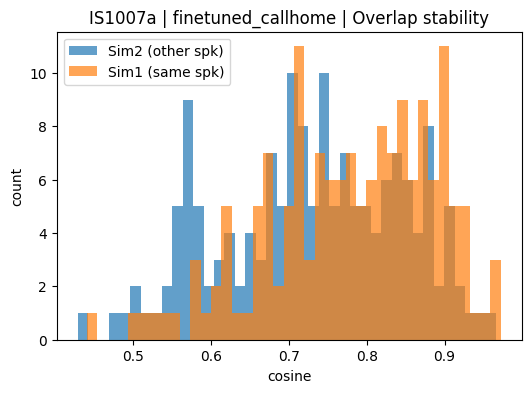


URI: IS1007a | crop_sec: 2.0
sampled clean=160 overlap=160 (overlap_rate~0.50)

[pretrained] CLEAN: same_mean=0.8132 diff_mean=0.6605 gap=0.1526  P(same>diff)≈0.831


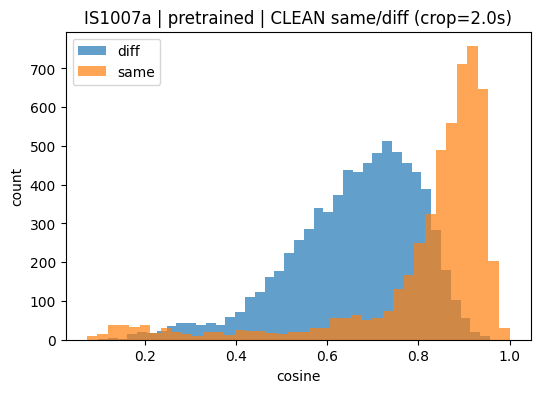

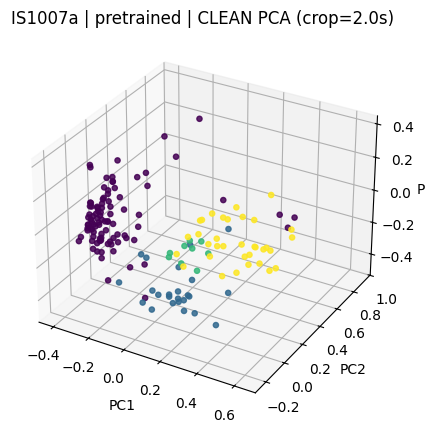

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.717 | Sim2(clean vs overlap-other) mean=0.678 | gap=0.039


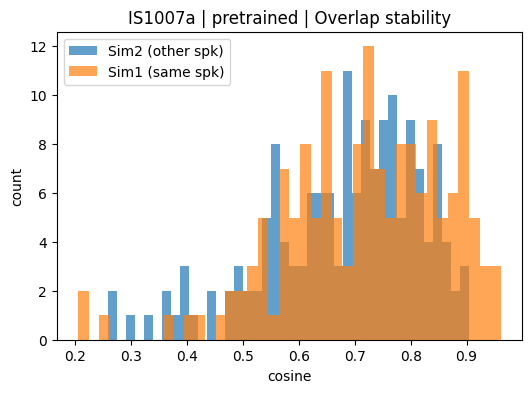


[finetuned_callhome] CLEAN: same_mean=0.8645 diff_mean=0.7178 gap=0.1468  P(same>diff)≈0.867


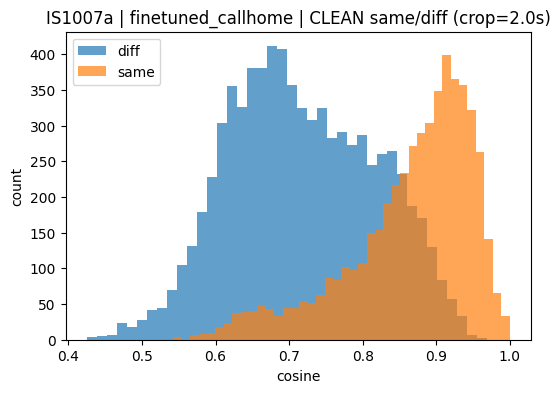

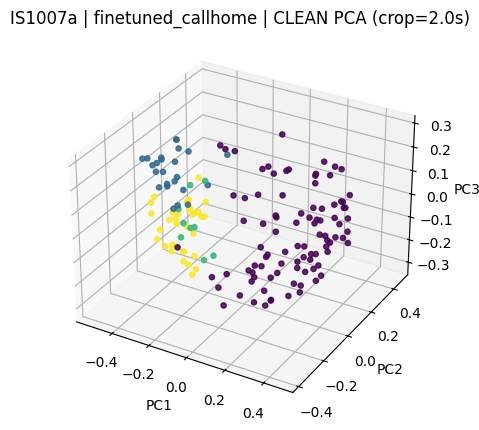

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.796 | Sim2(clean vs overlap-other) mean=0.755 | gap=0.041


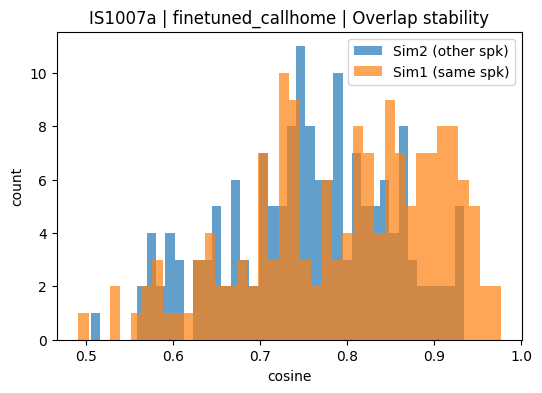


URI: IS1007a | crop_sec: 4.0
sampled clean=100 overlap=160 (overlap_rate~0.62)

[pretrained] CLEAN: same_mean=0.9266 diff_mean=0.7298 gap=0.1968  P(same>diff)≈0.993


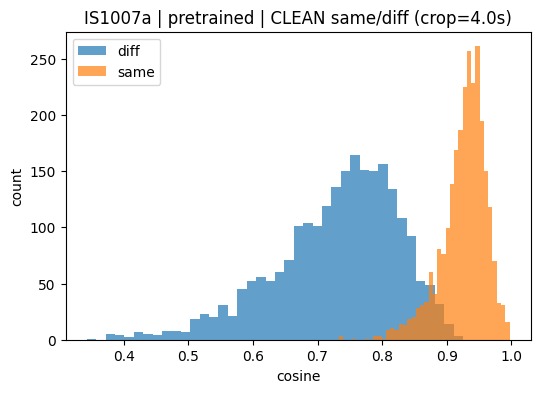

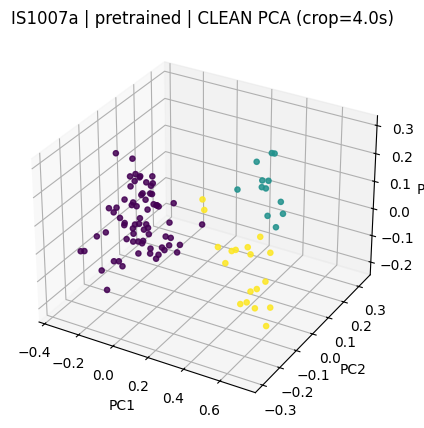

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.805 | Sim2(clean vs overlap-other) mean=0.729 | gap=0.076


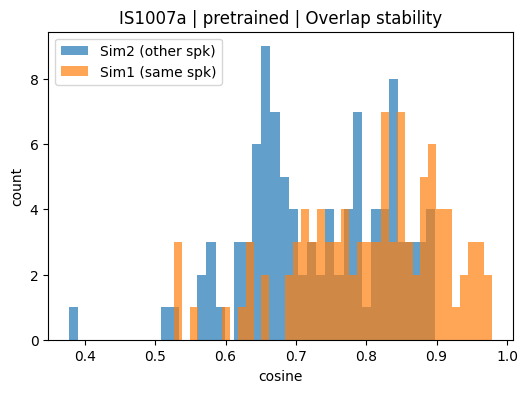


[finetuned_callhome] CLEAN: same_mean=0.9180 diff_mean=0.7173 gap=0.2007  P(same>diff)≈0.965


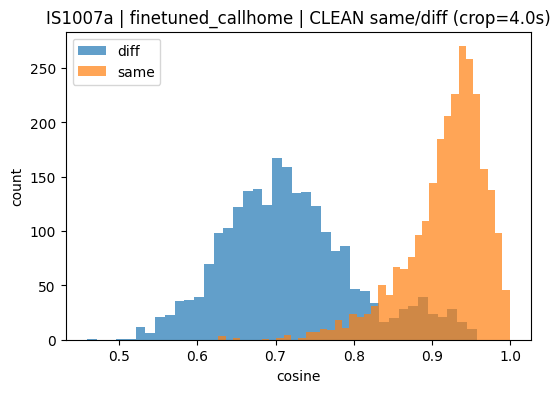

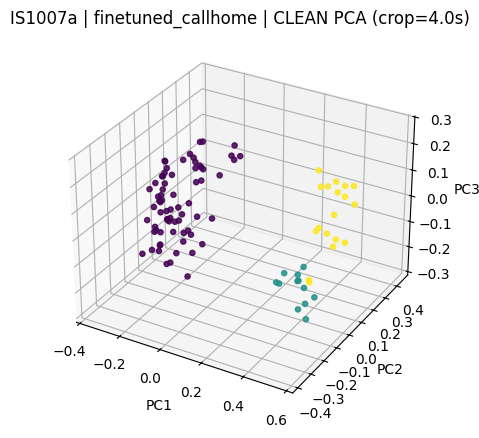

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.814 | Sim2(clean vs overlap-other) mean=0.754 | gap=0.060


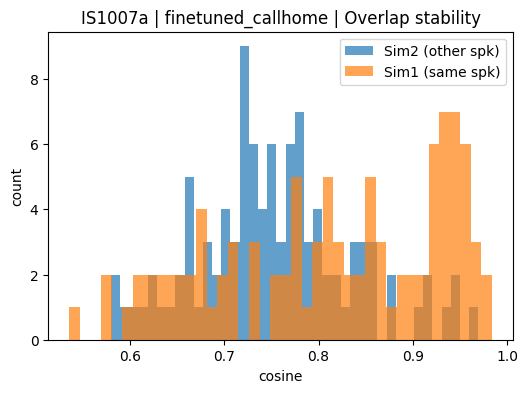


URI: ES2005a | crop_sec: 0.5
sampled clean=160 overlap=54 (overlap_rate~0.25)

[pretrained] CLEAN: same_mean=0.5485 diff_mean=0.3893 gap=0.1591  P(same>diff)≈0.719


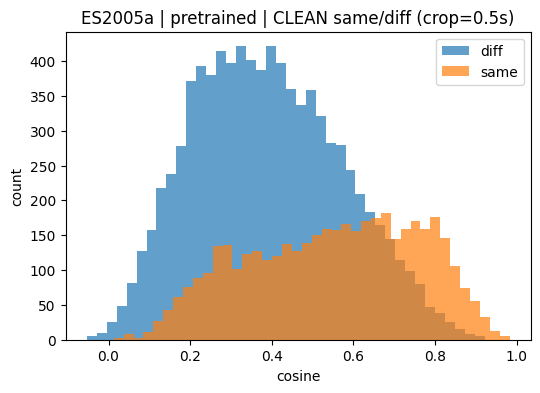

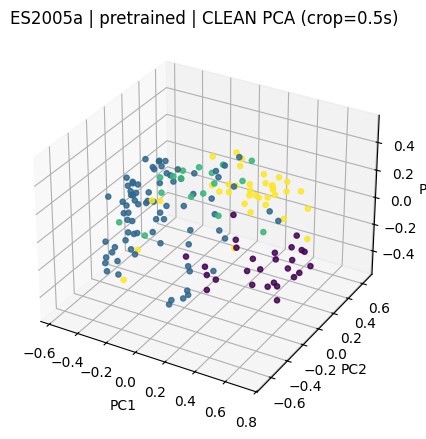

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.454 | Sim2(clean vs overlap-other) mean=0.320 | gap=0.134


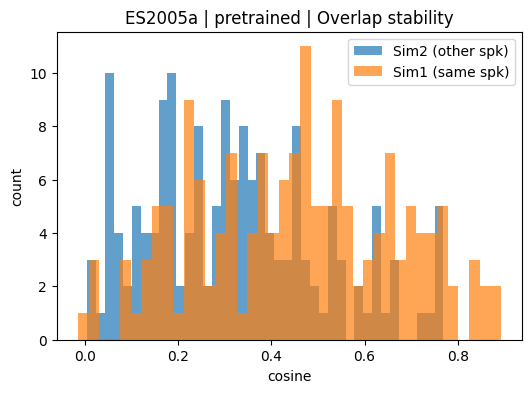


[finetuned_callhome] CLEAN: same_mean=0.7261 diff_mean=0.6334 gap=0.0927  P(same>diff)≈0.703


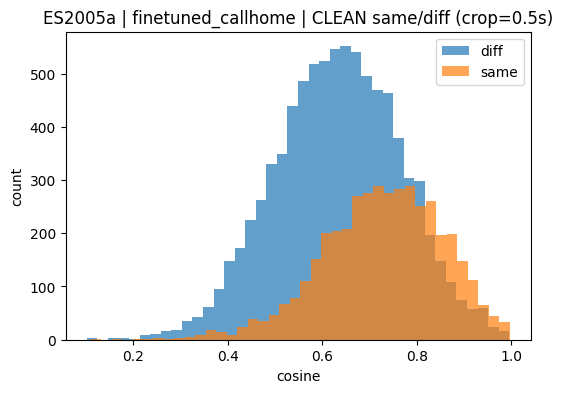

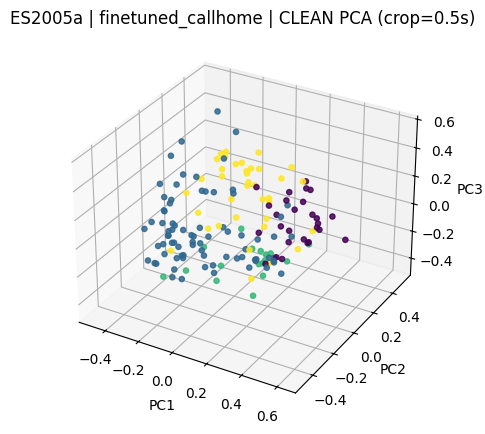

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.697 | Sim2(clean vs overlap-other) mean=0.644 | gap=0.053


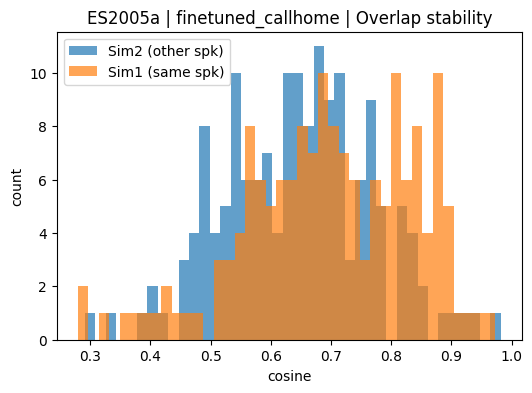


URI: ES2005a | crop_sec: 1.0
sampled clean=160 overlap=78 (overlap_rate~0.33)

[pretrained] CLEAN: same_mean=0.6778 diff_mean=0.4310 gap=0.2467  P(same>diff)≈0.819


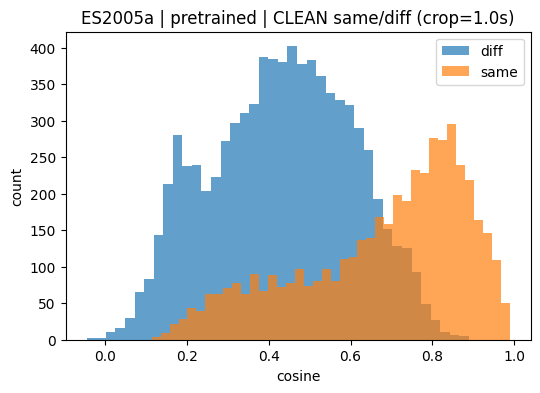

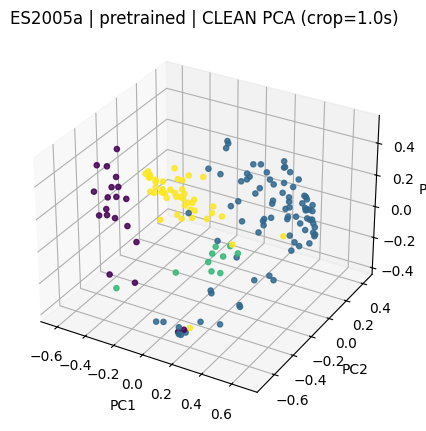

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.573 | Sim2(clean vs overlap-other) mean=0.419 | gap=0.154


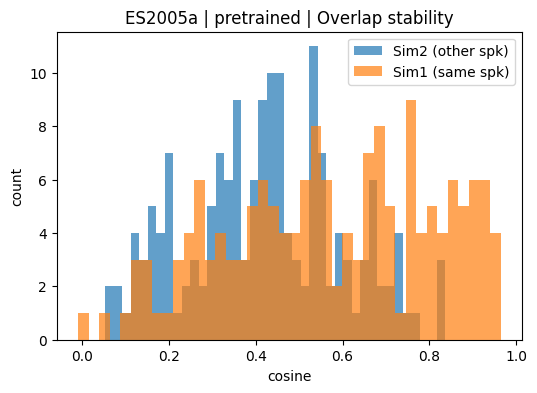


[finetuned_callhome] CLEAN: same_mean=0.8081 diff_mean=0.6812 gap=0.1269  P(same>diff)≈0.808


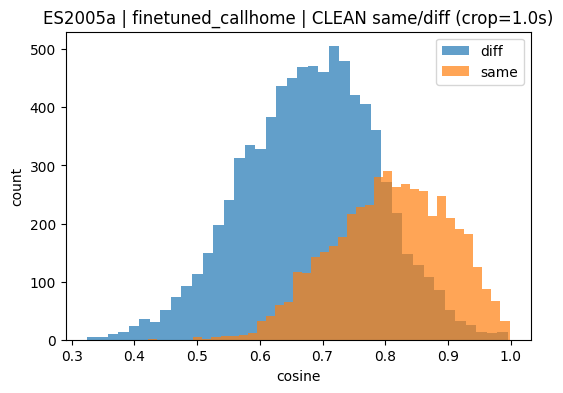

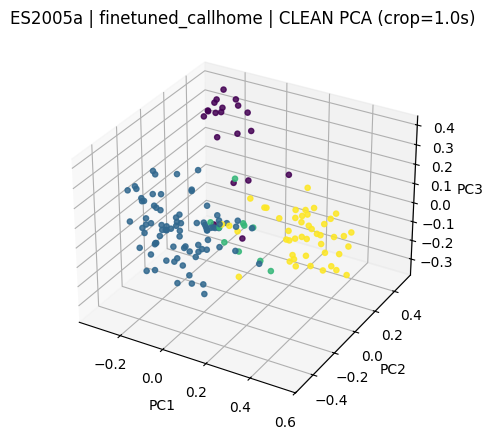

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.765 | Sim2(clean vs overlap-other) mean=0.724 | gap=0.041


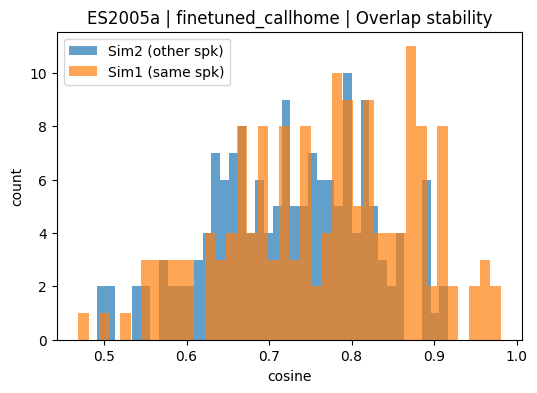


URI: ES2005a | crop_sec: 2.0
sampled clean=129 overlap=116 (overlap_rate~0.47)

[pretrained] CLEAN: same_mean=0.8288 diff_mean=0.4685 gap=0.3603  P(same>diff)≈0.932


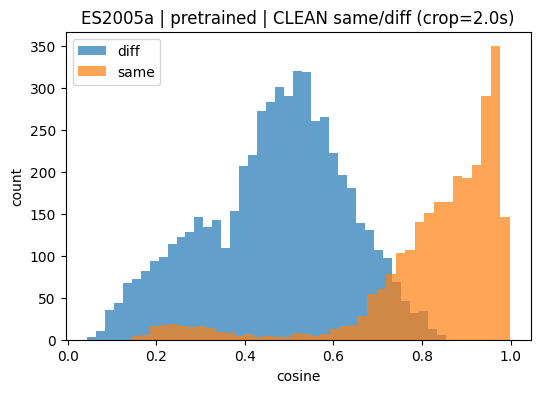

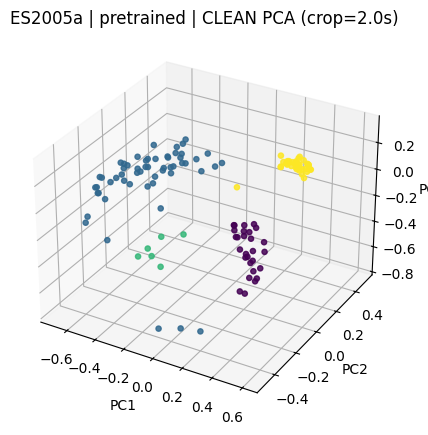

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.657 | Sim2(clean vs overlap-other) mean=0.461 | gap=0.196


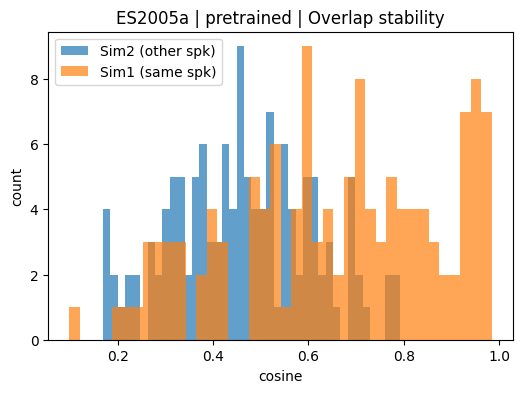


[finetuned_callhome] CLEAN: same_mean=0.8754 diff_mean=0.6970 gap=0.1784  P(same>diff)≈0.914


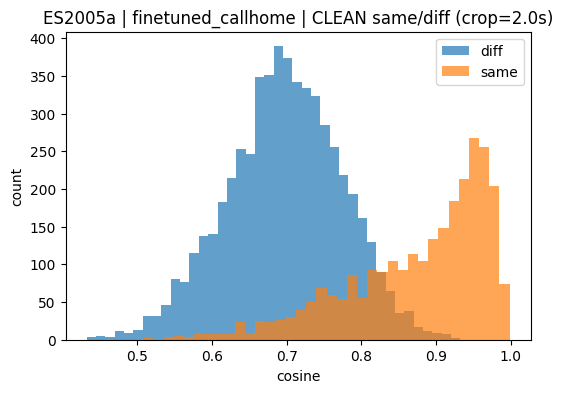

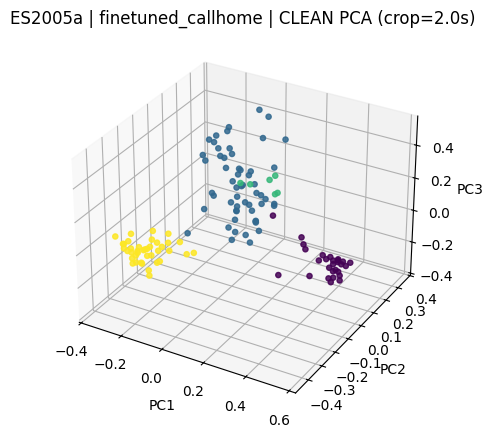

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.802 | Sim2(clean vs overlap-other) mean=0.705 | gap=0.097


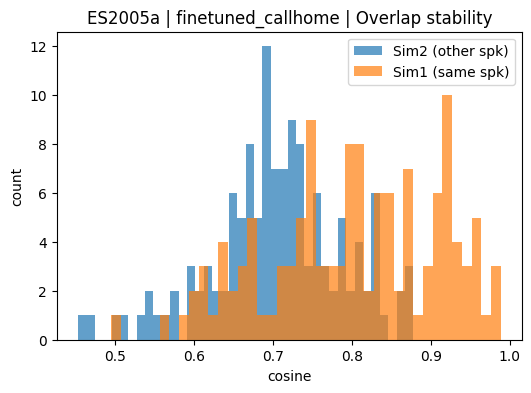


URI: ES2005a | crop_sec: 4.0
sampled clean=80 overlap=156 (overlap_rate~0.66)

[pretrained] CLEAN: same_mean=0.9488 diff_mean=0.5408 gap=0.4080  P(same>diff)≈0.996


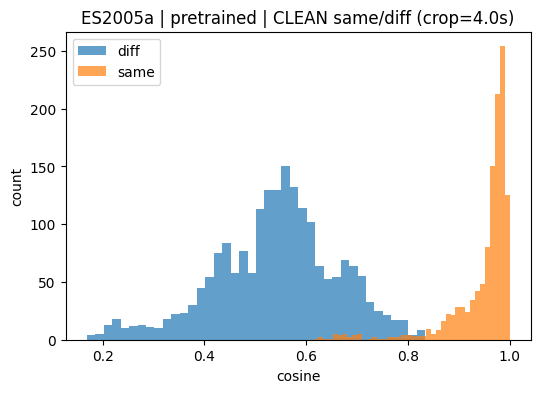

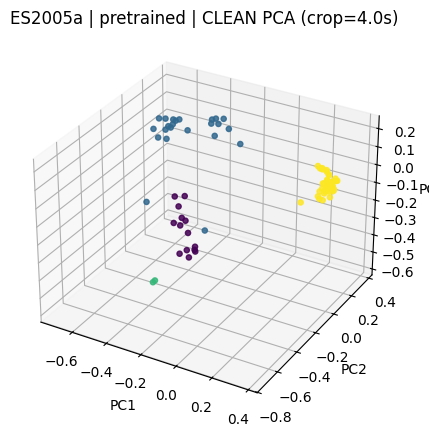

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.693 | Sim2(clean vs overlap-other) mean=0.543 | gap=0.150


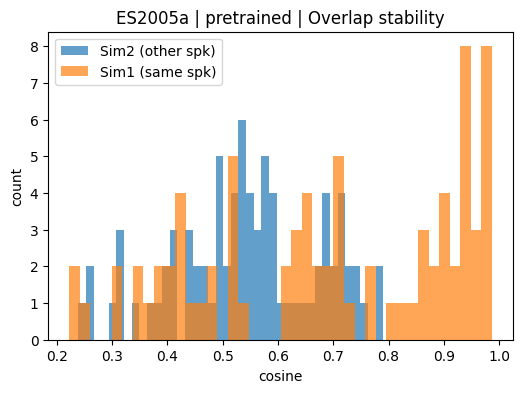


[finetuned_callhome] CLEAN: same_mean=0.9579 diff_mean=0.7245 gap=0.2334  P(same>diff)≈0.994


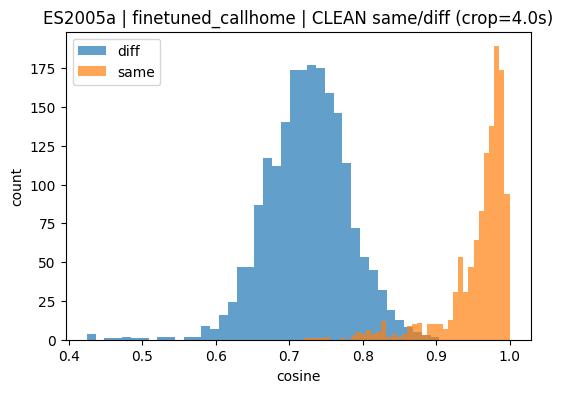

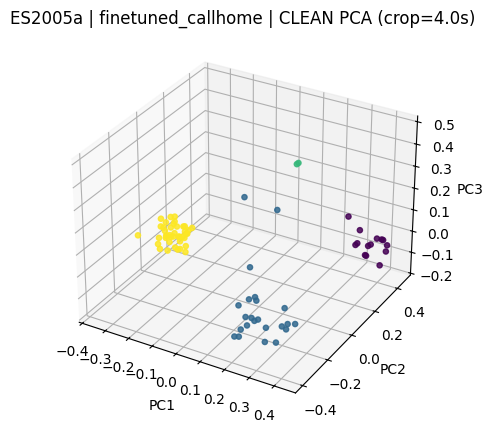

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.846 | Sim2(clean vs overlap-other) mean=0.739 | gap=0.107


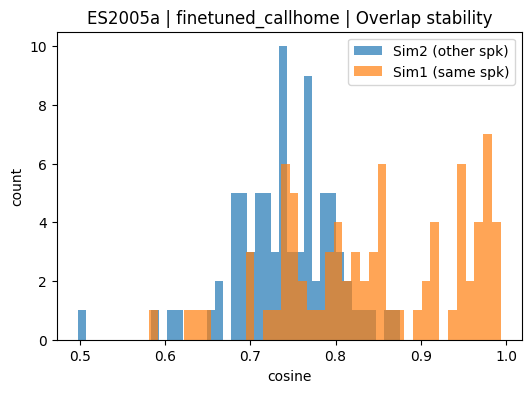


URI: TS3006a | crop_sec: 0.5
sampled clean=160 overlap=80 (overlap_rate~0.33)

[pretrained] CLEAN: same_mean=0.5349 diff_mean=0.5117 gap=0.0232  P(same>diff)≈0.533


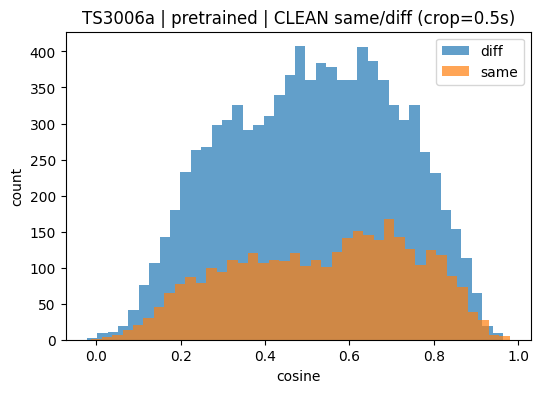

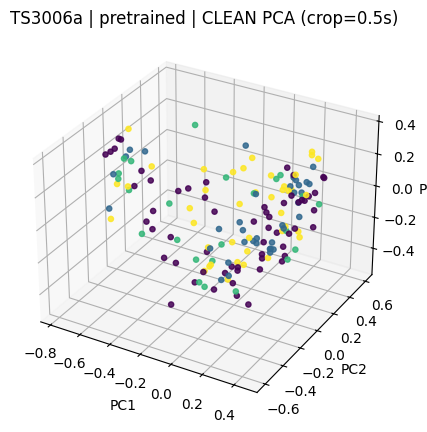

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.537 | Sim2(clean vs overlap-other) mean=0.520 | gap=0.016


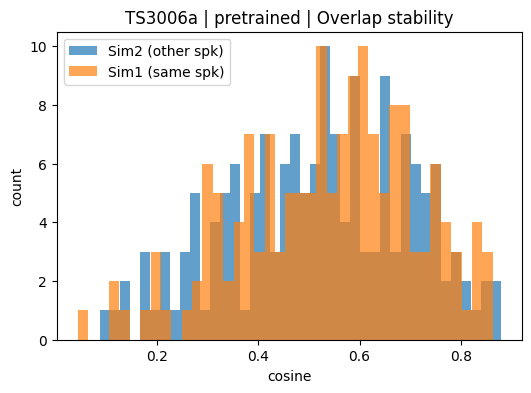


[finetuned_callhome] CLEAN: same_mean=0.7736 diff_mean=0.7382 gap=0.0355  P(same>diff)≈0.585


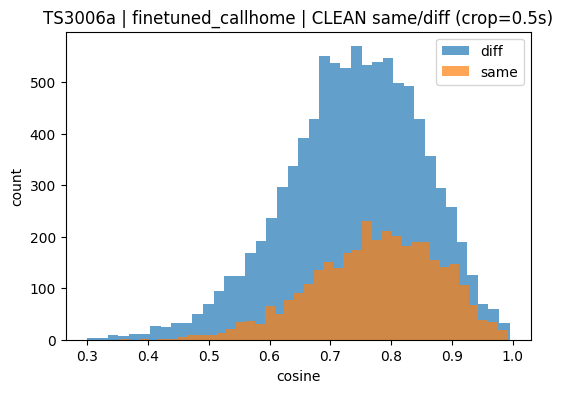

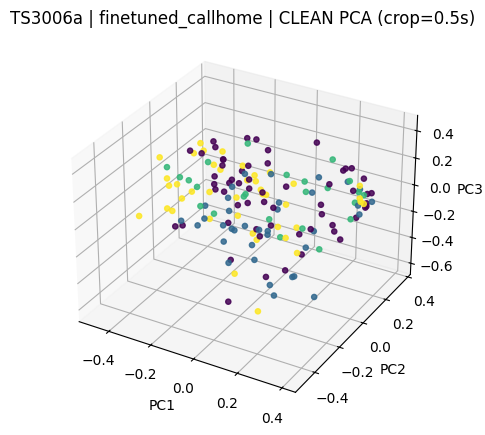

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.790 | Sim2(clean vs overlap-other) mean=0.761 | gap=0.029


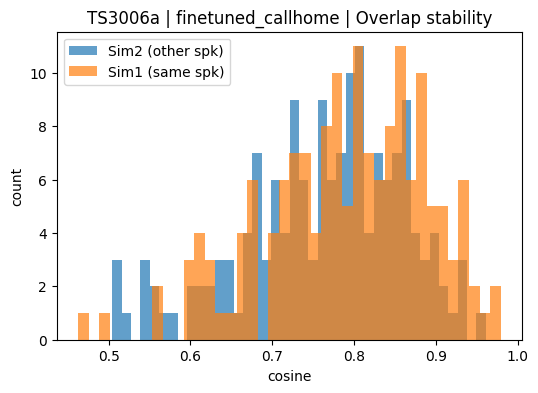


URI: TS3006a | crop_sec: 1.0
sampled clean=160 overlap=125 (overlap_rate~0.44)

[pretrained] CLEAN: same_mean=0.7016 diff_mean=0.6694 gap=0.0321  P(same>diff)≈0.579


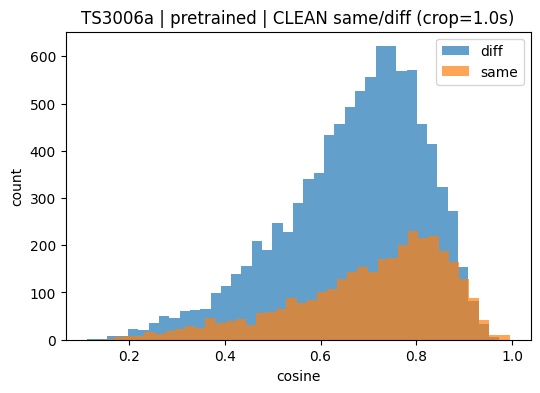

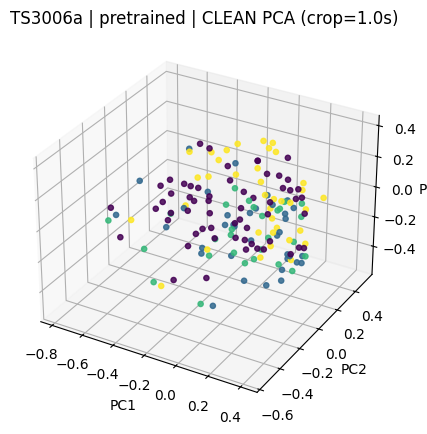

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.663 | Sim2(clean vs overlap-other) mean=0.653 | gap=0.009


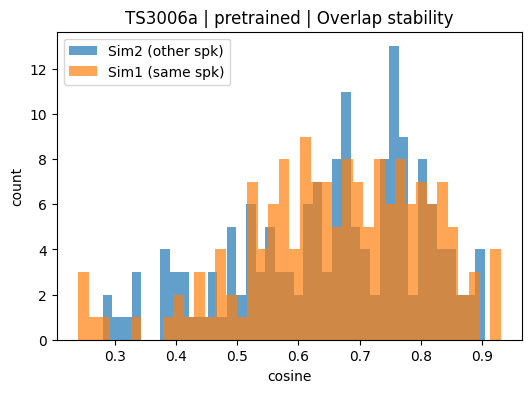


[finetuned_callhome] CLEAN: same_mean=0.8464 diff_mean=0.7766 gap=0.0698  P(same>diff)≈0.705


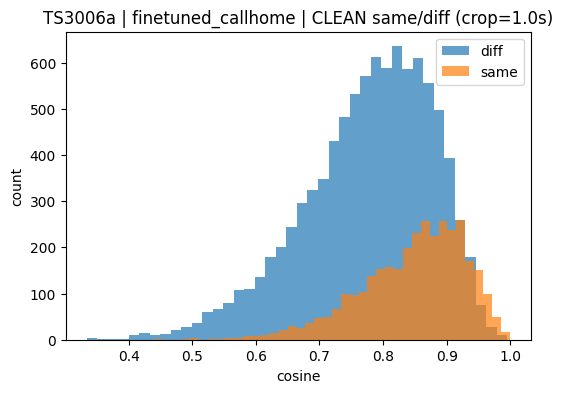

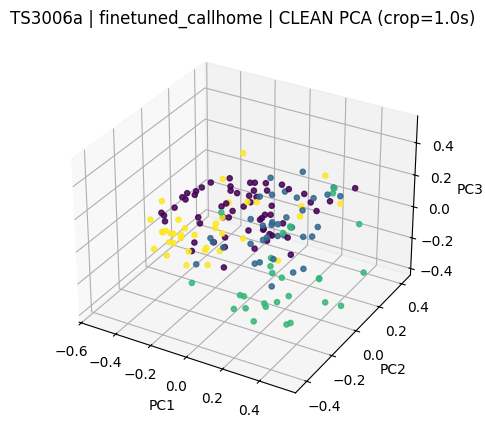

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.825 | Sim2(clean vs overlap-other) mean=0.795 | gap=0.029


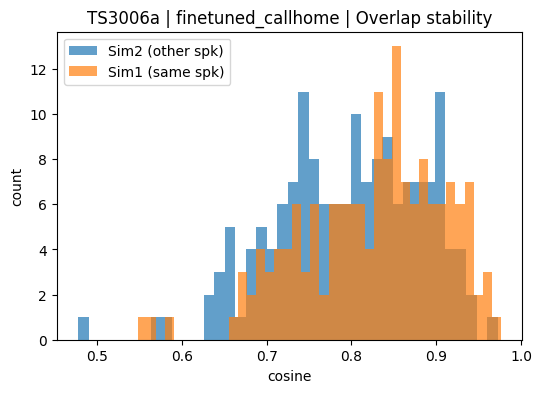


URI: TS3006a | crop_sec: 2.0
sampled clean=137 overlap=160 (overlap_rate~0.54)

[pretrained] CLEAN: same_mean=0.8440 diff_mean=0.7736 gap=0.0703  P(same>diff)≈0.731


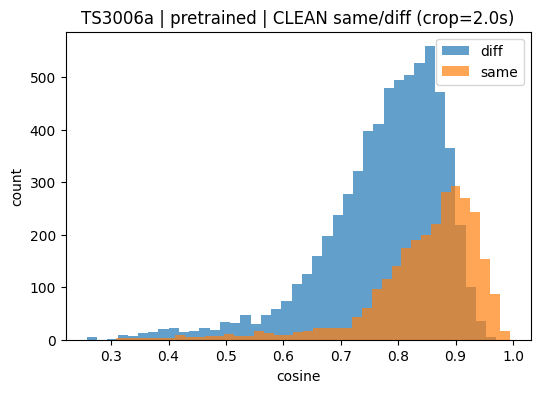

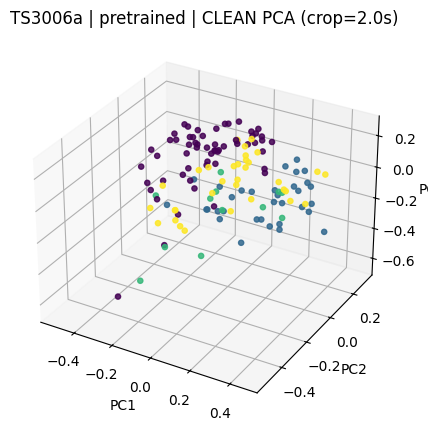

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.786 | Sim2(clean vs overlap-other) mean=0.765 | gap=0.021


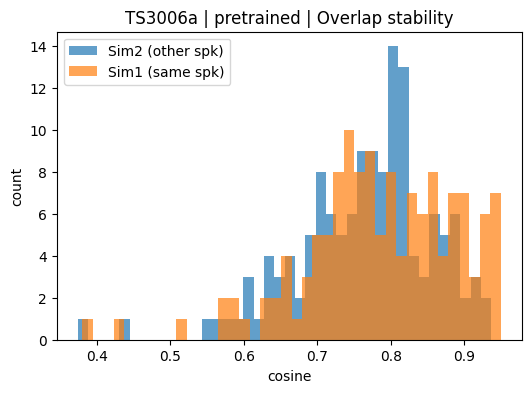


[finetuned_callhome] CLEAN: same_mean=0.9055 diff_mean=0.8096 gap=0.0959  P(same>diff)≈0.820


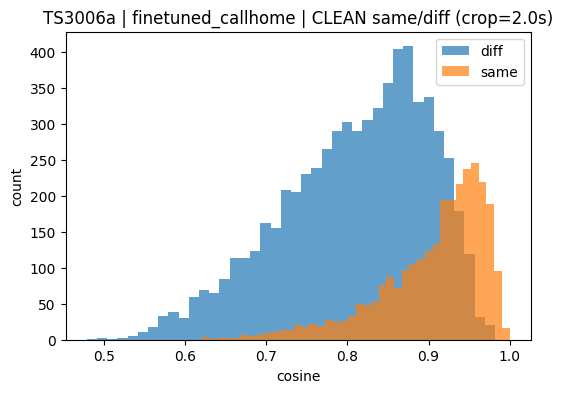

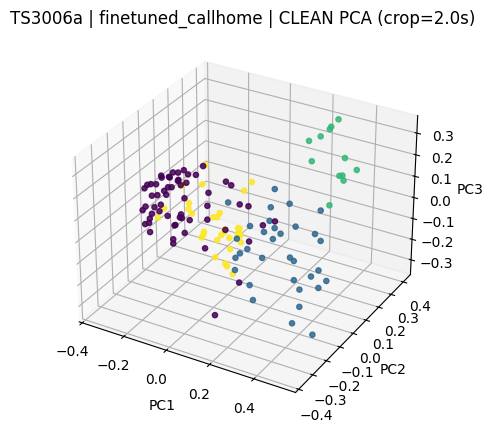

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.874 | Sim2(clean vs overlap-other) mean=0.826 | gap=0.047


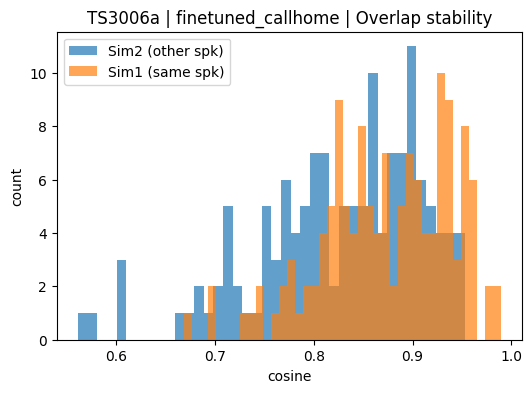


URI: TS3006a | crop_sec: 4.0
sampled clean=66 overlap=160 (overlap_rate~0.71)

[pretrained] CLEAN: same_mean=0.9357 diff_mean=0.8521 gap=0.0836  P(same>diff)≈0.909


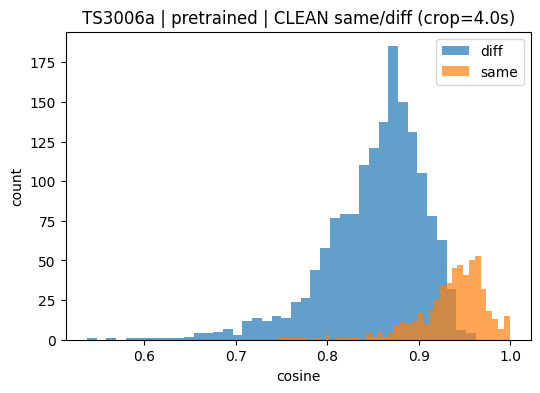

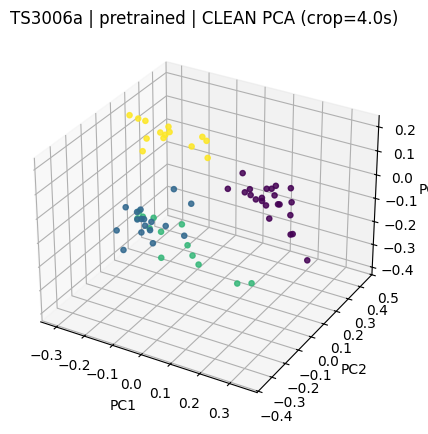

[pretrained] Overlap stability: Sim1(clean vs overlap-same) mean=0.851 | Sim2(clean vs overlap-other) mean=0.821 | gap=0.029


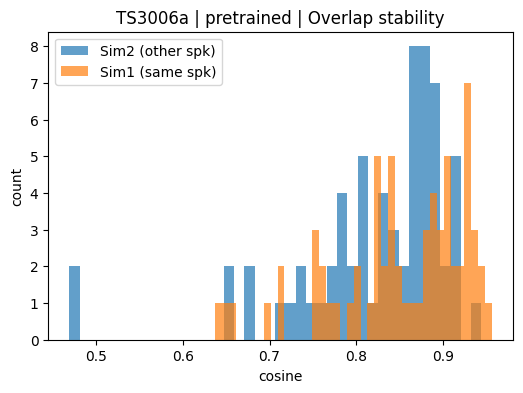


[finetuned_callhome] CLEAN: same_mean=0.9566 diff_mean=0.8273 gap=0.1293  P(same>diff)≈0.974


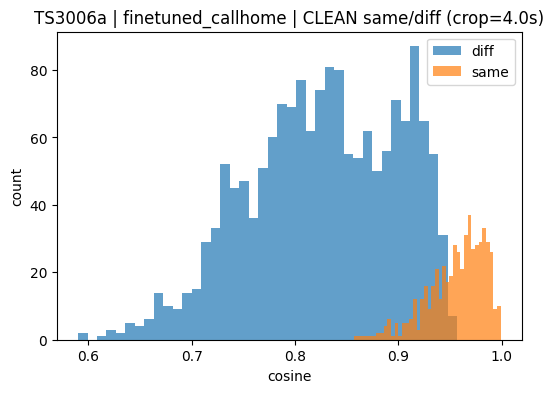

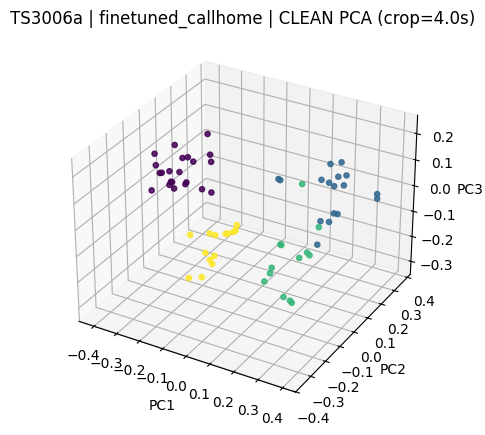

[finetuned_callhome] Overlap stability: Sim1(clean vs overlap-same) mean=0.877 | Sim2(clean vs overlap-other) mean=0.842 | gap=0.035


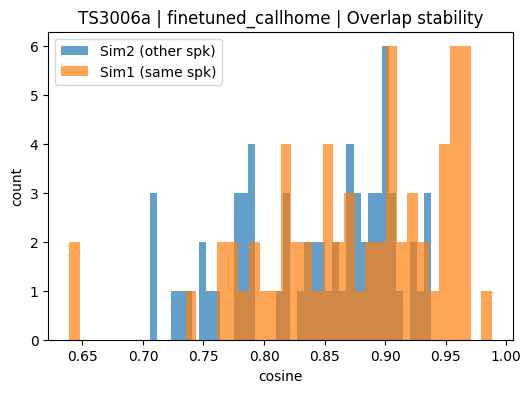

In [ ]:
def run_microscope(file, crop_sec=2.0, n=200):
    print("\n" + "="*80)
    print("URI:", file["uri"], "| crop_sec:", crop_sec)

    clean, ov = sample_windows(file, win_sec=crop_sec, n=n, min_dom=0.95)
    print(f"sampled clean={len(clean)} overlap={len(ov)} (overlap_rate~{len(ov)/(len(clean)+len(ov)+1e-9):.2f})")

    for name, model in [("pretrained", m_pre), ("finetuned_callhome", m_ft)]:
        Zc, yc, _ = embed_batch(file, clean, model, crop_sec)
        Zo, yo_dom, o_sets = embed_batch(file, ov, model, crop_sec)

        st_c = same_diff_stats(Zc, yc)
        print(f"\n[{name}] CLEAN: same_mean={st_c['same_mean']:.4f} diff_mean={st_c['diff_mean']:.4f} "
              f"gap={st_c['gap']:.4f}  P(same>diff)≈{st_c['p_same_gt_diff']:.3f}")

        plot_hist(st_c["same"], st_c["diff"], f"{file['uri']} | {name} | CLEAN same/diff (crop={crop_sec}s)")
        plot_pca(Zc, yc, f"{file['uri']} | {name} | CLEAN PCA (crop={crop_sec}s)")

        s1, s2 = sim1_sim2(Zc, yc, Zo, o_sets)
        if len(s1) >= 10:
            print(f"[{name}] Overlap stability: Sim1(clean vs overlap-same) mean={s1.mean():.3f} | "
                  f"Sim2(clean vs overlap-other) mean={s2.mean():.3f} | gap={s1.mean()-s2.mean():.3f}")
            plt.figure(figsize=(6,4))
            plt.hist(s2, bins=40, alpha=0.7, label="Sim2 (other spk)")
            plt.hist(s1, bins=40, alpha=0.7, label="Sim1 (same spk)")
            plt.title(f"{file['uri']} | {name} | Overlap stability")
            plt.xlabel("cosine"); plt.ylabel("count")
            plt.legend()
            plt.show()
        else:
            print(f"[{name}] Not enough overlap pairs for Sim1/Sim2 (got {len(s1)})")

for f in dev_files:
    for crop_sec in CROP_SEC_LIST:
        run_microscope(f, crop_sec=crop_sec, n=160)


What your numbers are saying (IS1007a)
1) Duration sensitivity is huge

For the pretrained model:

0.5s clean: gap=0.063, P(same>diff)=0.596 (meh but usable)

1.0s clean: gap=0.079, P=0.640 (better)

2.0s clean: gap=0.153, P=0.831 (strong)

So the embedder is not fundamentally broken. It becomes good once the effective window is ~2s.

✅ Interpretation: if diarization is embedding on many <1s turns, you are operating in the worst regime.

2) The real smoking gun: overlap at 0.5s

Pretrained at 0.5s:

Sim1 (clean vs overlap-same) = 0.446

Sim2 (clean vs overlap-other) = 0.473

gap = -0.027 (inverted!)

That means: overlap embeddings are drifting toward the wrong speaker more than the correct speaker at short durations.

That alone can cause:

speaker swaps around overlaps

clustering merges/splits that look random

high confusion even if segmentation is fine

At 1.0s, overlap becomes sane again (gap +0.074). So overlap + short windows is the toxic combo.

3) Finetuned_callhome: “more stable but less discriminative”

Finetuned_callhome has very high absolute cosines (same ~0.73–0.80, diff ~0.69–0.73). That typically means:

it’s compressing the embedding space (everyone is similar to everyone)

the gap is smaller than you’d want (esp at 0.5s)

clustering thresholds must be re-calibrated (defaults will over-merge)

But: it has positive overlap stability even at 0.5s (gap +0.020). That’s good — it’s less “inverted” than pretrained. Still, +0.02 is tiny, so overlap remains hard.

Root cause hypothesis (high confidence now)

Your diarization is likely failing because the pipeline is embedding many short segments (<1s) and/or overlap-contaminated segments, and in that regime:

pretrained SV embeddings are unstable in overlap (even inverted at 0.5s)

finetuned callhome embeddings are too globally similar → clustering needs new thresholds and/or longer windows

So the fix is not “train longer”. The fix is:

Make embedding extraction robust to short turns + overlap

That’s the lever.

In [ ]:
# Step A — Confirm the pipeline is producing lots of short segments

# Run this on each meeting with your current segmentation output (baseline pipeline or your custom seg):

# Cell: segment duration histogram + “how many are <1s?”

import numpy as np
import matplotlib.pyplot as plt
from pyannote.audio import Pipeline

pipe = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1", use_auth_token=True)

def seg_stats(file):
    hyp = pipe(file)
    segs = [seg for seg,_,_ in hyp.itertracks(yield_label=True)]
    durs = np.array([s.duration for s in segs], dtype=np.float32)

    print(file["uri"], "num_segs=", len(durs),
          "pct<0.5s=", float((durs<0.5).mean()),
          "pct<1.0s=", float((durs<1.0).mean()),
          "median=", float(np.median(durs)))

    plt.figure(figsize=(6,3))
    plt.hist(durs, bins=50)
    plt.title(f"{file['uri']} segment durations")
    plt.xlabel("seconds"); plt.ylabel("count")
    plt.show()

for f in dev_files:  # IS1007a, ES2005a, TS3006a
    seg_stats(f)



config.yaml:   0%|          | 0.00/469 [00:00<?, ?B/s]

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)


KeyboardInterrupt: 

IS1007a [REF] num_turns= 242 pct<0.5s= 0.21074380165289255 pct<1.0s= 0.3925619834710744 median= 1.5299999713897705


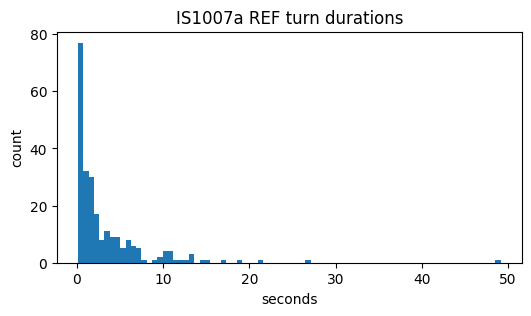

ES2005a [REF] num_turns= 76 pct<0.5s= 0.3815789473684211 pct<1.0s= 0.5394736842105263 median= 0.7649999856948853


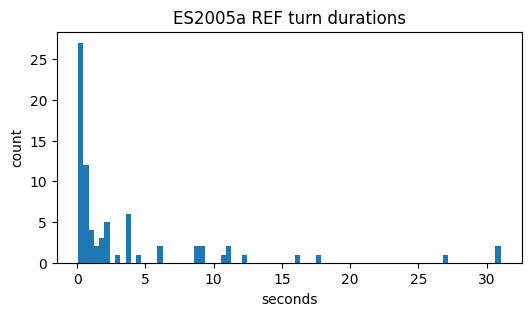

TS3006a [REF] num_turns= 397 pct<0.5s= 0.29219143576826195 pct<1.0s= 0.4508816120906801 median= 1.1699999570846558


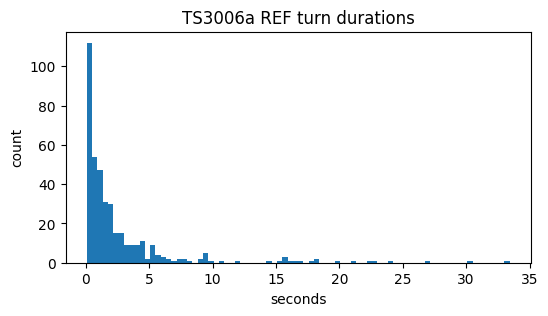

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ref_turn_stats(file):
    ref = file["annotation"]
    segs = [seg for seg,_,_ in ref.itertracks(yield_label=True)]
    durs = np.array([s.duration for s in segs], dtype=np.float32)

    print(file["uri"], "[REF] num_turns=", len(durs),
          "pct<0.5s=", float((durs<0.5).mean()),
          "pct<1.0s=", float((durs<1.0).mean()),
          "median=", float(np.median(durs)))

    plt.figure(figsize=(6,3))
    plt.hist(durs, bins=80)
    plt.title(f"{file['uri']} REF turn durations")
    plt.xlabel("seconds"); plt.ylabel("count")
    plt.show()

for f in dev_files:   # your 3 files
    ref_turn_stats(f)


Nice — that plot answers the key question without running the full pipeline:

ES2005a (REF): pct<0.5s ≈ 0.382, pct<1.0s ≈ 0.539, median ≈ 0.765s

TS3006a (REF): pct<0.5s ≈ 0.292, pct<1.0s ≈ 0.451, median ≈ 1.17s, and 397 turns (way more than ES2005a)

So yes: AMI has lots of short turns (even in REF), and the diarization system will often produce even shorter hypothesis turns.

But the important nuance (from your microscope stats) is:

ES2005a: your embeddings are already separable even at 0.5s → short turns alone aren’t fatal.

TS3006a: clean separation is weak and overlap separation is tiny at all durations → TS3006a is the meeting that makes your SV embedder look “bad”.

That means the root problem is TS3006a-style embedding geometry drift + overlap contamination, not just “segments are short”.

Do this next: a fast, targeted drill-down that doesn’t take 30+ minutes

Instead of running full speaker-diarization-3.1 over 30–60 minutes, we’ll:

run the baseline pipeline on first 6–8 minutes of TS3006a (fast enough),

take its segments,

re-embed them with your WavLM-SV using duration-adaptive, overlap-aware window selection,

use graph clustering (local, not one global δ),

evaluate DER on the same slice.

This directly tests the two fixes your numbers suggest:

“don’t embed on tiny windows / overlap-heavy windows”

“don’t depend on one global clustering threshold when cosine scale drifts”

/usr/local/lib/python3.12/dist-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)


TS3006a [PRED first 8.0 min] num_turns= 579 pct<0.5s= 0.5474956822107081 pct<1.0s= 0.6666666666666666 median= 0.3881250023841858


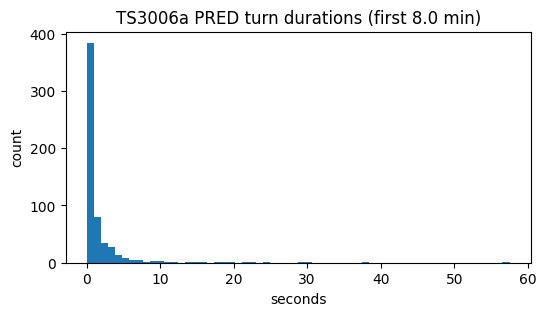

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from pyannote.core import Timeline, Segment
from pyannote.audio import Pipeline
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipe = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1", use_auth_token=True)
try:
    pipe.to(device)
except Exception:
    pass

def trim_file(file, t=480.0):  # 480s = 8 min (use 300s for 5 min)
    f = copy.deepcopy(file)
    # restrict computation to first t seconds
    f["annotated"] = Timeline([Segment(0.0, t)])
    return f

def seg_stats_fast(file, t=480.0):
    f = trim_file(file, t=t)
    hyp = pipe(f)

    segs = [seg for seg,_,_ in hyp.itertracks(yield_label=True)]
    durs = np.array([s.duration for s in segs], dtype=np.float32)

    print(file["uri"], f"[PRED first {t/60:.1f} min] num_turns=", len(durs),
          "pct<0.5s=", float((durs<0.5).mean()),
          "pct<1.0s=", float((durs<1.0).mean()),
          "median=", float(np.median(durs)))

    plt.figure(figsize=(6,3))
    plt.hist(durs, bins=60)
    plt.title(f"{file['uri']} PRED turn durations (first {t/60:.1f} min)")
    plt.xlabel("seconds"); plt.ylabel("count")
    plt.show()

# Run ONLY TS3006a first (it's your problematic meeting)
for f in dev_files:
    if f["uri"] == "TS3006a":
        seg_stats_fast(f, t=480.0)  # try 300.0 if you want even faster


This is a huge finding. Your slice stats basically confirm the core integration problem:

TS3006a (PRED, first 8 min)

num_turns = 579

pct<0.5s = 0.547

pct<1.0s = 0.667

median = 0.388s

So the pipeline is producing tons of micro-turns — much shorter than REF (REF median ~1.17s, pct<1s ~0.45). That means your SV embedding is being asked to work in the 0.5s regime most of the time, which is exactly where your microscope showed TS3006a is weak and overlap stability is tiny.

✅ Root cause now is very clear:

Diarization is dominated by short predicted turns (<1s), especially TS3006a, and your embedding geometry in that regime is not robust.
So confusion/over-splitting is expected.

Now we can fix this without retraining by making the pipeline produce fewer micro-turns and/or embedding those micro-turns with longer context.

What to do next (fastest path to improvement)
1) Fix the “micro-turn explosion” with two knobs

These are segmentation post-processing knobs that directly control fragmentation:

min_duration_on: merge tiny on-regions

min_duration_off: fill tiny gaps (reduce flicker)

In many AMI cases, setting min_duration_on ~ 0.3–0.6 and min_duration_off ~ 0.2–0.5 massively reduces micro-turns.

Minimal cell: tune just to reduce micro-turns (NOT optimize DER yet)

In [ ]:
# all params

from pyannote.audio import Pipeline

pipe0 = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1", use_auth_token=True)

# list parameter names the pipeline accepts
params = pipe0.parameters()
print("N params:", len(params))
for p in params:
    print(p)


config.yaml:   0%|          | 0.00/469 [00:00<?, ?B/s]

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

N params: 2
segmentation
clustering


In [ ]:
from copy import deepcopy

def accepts(cfg):
    p = deepcopy(pipe0)
    try:
        p.instantiate(cfg)
        return True, None
    except Exception as e:
        return False, str(e)

# candidate knobs (some may not exist in your build)
seg_candidates = {
    "threshold": 0.6,
    "min_duration_off": 0.2,
    "min_duration_on": 0.2,
    "pad_onset": 0.0,
    "pad_offset": 0.0,
}

clu_candidates = {
    "threshold": 0.7,
    "method": "centroid",
    "linkage": "average",
    "min_cluster_size": 12,
}

print("=== SEGMENTATION accepts ===")
for k, v in seg_candidates.items():
    ok, err = accepts({"segmentation": {k: v}})
    print(k, "✅" if ok else f"❌ ({err})")

print("\n=== CLUSTERING accepts ===")
for k, v in clu_candidates.items():
    ok, err = accepts({"clustering": {k: v}})
    print(k, "✅" if ok else f"❌ ({err})")


=== SEGMENTATION accepts ===
threshold ❌ (parameter 'threshold' does not exist)
min_duration_off ✅
min_duration_on ❌ (parameter 'min_duration_on' does not exist)
pad_onset ❌ (parameter 'pad_onset' does not exist)
pad_offset ❌ (parameter 'pad_offset' does not exist)

=== CLUSTERING accepts ===
threshold ✅
method ✅
linkage ❌ (parameter 'linkage' does not exist)
min_cluster_size ✅


In [ ]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

def count_microturns(hyp):
    segs = [seg for seg,_,_ in hyp.itertracks(yield_label=True)]
    durs = np.array([s.duration for s in segs], dtype=np.float32)
    return {
        "num": len(durs),
        "pct<0.5": float((durs<0.5).mean()),
        "pct<1.0": float((durs<1.0).mean()),
        "median": float(np.median(durs)),
        "durs": durs
    }

mins = [0.0, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.60]

rows = []
best = None

for m in mins:
    p = deepcopy(pipe0)
    p.instantiate({"segmentation": {"min_duration_off": m}})
    hyp = p(f)  # TS3006a slice object (first 8 min)
    st = count_microturns(hyp)
    rows.append((m, st))
    score = st["pct<1.0"] + 0.5*st["pct<0.5"]  # heuristic: lower is better
    if best is None or score < best[0]:
        best = (score, m, st)

    print(f"min_off={m:0.2f} -> num={st['num']}  pct<0.5={st['pct<0.5']:.3f}  pct<1.0={st['pct<1.0']:.3f}  median={st['median']:.3f}")

print("\nBEST by heuristic:", "min_off=", best[1], "stats=", {k:best[2][k] for k in ["num","pct<0.5","pct<1.0","median"]})

# optional: visualize best histogram
m_best = best[1]
d_best = best[2]["durs"]
plt.figure(figsize=(6,3))
plt.hist(d_best, bins=60)
plt.title(f"TS3006a PRED turn durations (first 8 min) | min_off={m_best}")
plt.xlabel("seconds"); plt.ylabel("count")
plt.show()


/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)


KeyboardInterrupt: 

/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)


BASE speech_tl: {'num': 205, 'pct<0.5': 0.2, 'pct<1.0': 0.34146341463414637, 'median': 1.8056249618530273}
min_off=0.00 -> num=205 pct<0.5=0.200 pct<1.0=0.341 median=1.806
min_off=0.05 -> num=199 pct<0.5=0.196 pct<1.0=0.342 median=1.806
min_off=0.10 -> num=192 pct<0.5=0.188 pct<1.0=0.333 median=1.848
min_off=0.15 -> num=185 pct<0.5=0.178 pct<1.0=0.330 median=2.025
min_off=0.20 -> num=175 pct<0.5=0.160 pct<1.0=0.303 median=2.059
min_off=0.30 -> num=155 pct<0.5=0.129 pct<1.0=0.258 median=2.329
min_off=0.40 -> num=145 pct<0.5=0.124 pct<1.0=0.248 median=2.447
min_off=0.60 -> num=119 pct<0.5=0.092 pct<1.0=0.193 median=3.021

BEST: min_off= 0.6 {'num': 119, 'pct<0.5': 0.09243697478991597, 'pct<1.0': 0.19327731092436976, 'median': 3.020625114440918}


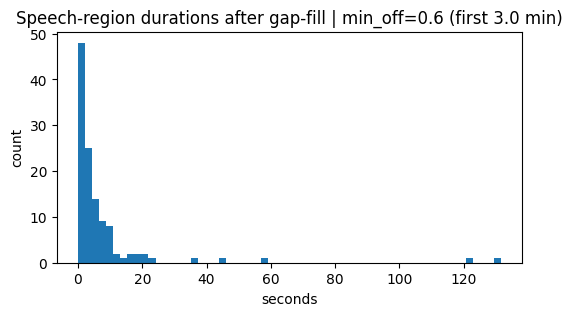

In [ ]:
import copy, numpy as np
import matplotlib.pyplot as plt
from pyannote.core import Timeline, Segment

# --- make slice shorter for exploration ---
T_SLICE = 180.0  # 3 minutes (use 120 for 2 min)
f_short = copy.deepcopy(f0)  # f0 is the original TS3006a file dict
f_short["annotated"] = Timeline([Segment(0.0, T_SLICE)])

# 1) ONE slow run only (but now 2–3 minutes, not 8+)
hyp_once = pipe0(f_short)

# 2) speech activity timeline (SAD-like) = union of all speaker turns
speech_tl = hyp_once.get_timeline().support()

def fill_gaps(tl: Timeline, min_off: float) -> Timeline:
    segs = sorted(list(tl), key=lambda s: s.start)
    if not segs:
        return tl
    out = []
    cur = segs[0]
    for s in segs[1:]:
        if s.start - cur.end <= min_off:
            cur = Segment(cur.start, max(cur.end, s.end))
        else:
            out.append(cur); cur = s
    out.append(cur)
    return Timeline(out).support()

def tl_stats(tl: Timeline):
    durs = np.array([s.duration for s in tl], dtype=np.float32)
    return {
        "num": len(durs),
        "pct<0.5": float((durs<0.5).mean()) if len(durs) else 0.0,
        "pct<1.0": float((durs<1.0).mean()) if len(durs) else 0.0,
        "median": float(np.median(durs)) if len(durs) else 0.0,
        "durs": durs
    }

mins = [0.0, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.60]
base = tl_stats(speech_tl)
print("BASE speech_tl:", {k:base[k] for k in ["num","pct<0.5","pct<1.0","median"]})

best = None
for m in mins:
    tl2 = fill_gaps(speech_tl, min_off=m)
    st = tl_stats(tl2)
    score = st["pct<1.0"] + 0.5*st["pct<0.5"]
    best = (score, m, st) if (best is None or score < best[0]) else best
    print(f"min_off={m:0.2f} -> num={st['num']} pct<0.5={st['pct<0.5']:.3f} pct<1.0={st['pct<1.0']:.3f} median={st['median']:.3f}")

print("\nBEST:", "min_off=", best[1], {k:best[2][k] for k in ["num","pct<0.5","pct<1.0","median"]})

plt.figure(figsize=(6,3))
plt.hist(best[2]["durs"], bins=60)
plt.title(f"Speech-region durations after gap-fill | min_off={best[1]} (first {T_SLICE/60:.1f} min)")
plt.xlabel("seconds"); plt.ylabel("count")
plt.show()


Great — this is exactly the kind of “fast sweep” we needed. And the result is strong:

TS3006a (first 3 min) speech regions after gap-fill

baseline speech_tl: pct<1s = 0.341, median ~1.81s

with min_off=0.6: pct<1s = 0.193, median ~3.02s, num regions 205 → 119

So min_duration_off is doing what we want: it’s massively reducing speech fragmentation at the SAD level.

But there’s an important nuance:

Why min_off=0.6 might be “too aggressive” for diarization

This sweep is on speech regions (union of all speakers), not speaker turns.
Filling gaps of 0.6s can merge across:

real pauses between utterances

speaker change boundaries (especially quick backchannels)

short silences that help clustering separate turns

So while it reduces fragmentation, it might increase:

false alarm (speech where there is none)

confusion (merging across speaker changes)

That’s why I’d treat 0.6 as an upper bound and test 0.2–0.4 first for diarization, then compare against 0.6.

Step 2A — Pick 3 candidates (0.2, 0.4, 0.6) and run ONE 8-min diarization each

In [ ]:
from copy import deepcopy
from pyannote.metrics.diarization import DiarizationErrorRate

def eval_slice(pipeline, file_slice):
    metric = DiarizationErrorRate(collar=0.25, skip_overlap=False)
    hyp = pipeline(file_slice)
    metric(file_slice["annotation"], hyp, uem=file_slice["annotated"])
    return float(abs(metric)), float(metric["false alarm"]), float(metric["missed detection"]), float(metric["confusion"])

cands = [0.2, 0.4, 0.6]
for m in cands:
    p = deepcopy(pipe0)
    p.instantiate({"segmentation": {"min_duration_off": m}})
    der, fa, miss, conf = eval_slice(p, f)  # f = TS3006a first 8 min
    print(f"min_off={m:.2f} -> DER={der:.3f} | FA={fa:.3f} MISS={miss:.3f} CONF={conf:.3f}")


min_off=0.20 -> DER=0.329 | FA=13.661 MISS=41.844 CONF=39.702
min_off=0.40 -> DER=0.333 | FA=16.066 MISS=41.090 CONF=39.376


KeyboardInterrupt: 

Run baseline pipeline once on a slice (default 3 min for speed; switch to 8 min)

Take the predicted speaker turns (keeps overlap)

Re-embed each turn with duration-adaptive centered crop (short turns get 2s)

Mean-center + L2 normalize embeddings

Graph (mutual-kNN) clustering

Build a new Annotation

Report DER + FA/MISS/CONF for baseline vs reclustered

# TS3006a slice reclustering with duration-adaptive WavLM-SV embeddings
# (baseline pipeline ONCE -> re-embed -> graph cluster -> DER breakdown)

In [ ]:
import torch, torchaudio
import numpy as np

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def _load_audio_crop(audio_path, start_sec, dur_sec, target_sr=16000):
    wav, sr = torchaudio.load(audio_path)  # (C,T)
    if wav.size(0) > 1:
        wav = wav.mean(dim=0, keepdim=True)
    if sr != target_sr:
        wav = torchaudio.functional.resample(wav, sr, target_sr)
        sr = target_sr
    s = int(round(start_sec * sr))
    e = int(round((start_sec + dur_sec) * sr))
    s = max(0, min(s, wav.size(1)))
    e = max(0, min(e, wav.size(1)))
    crop = wav[:, s:e]
    # if crop is empty or too short, pad
    min_len = int(0.25 * sr)  # 250 ms minimum
    if crop.size(1) < min_len:
        pad = min_len - crop.size(1)
        crop = torch.nn.functional.pad(crop, (0, pad))
    return crop, sr

@torch.no_grad()
def embed_segment(model, audio_path, start_sec, dur_sec, device=device, target_sr=16000):
    """
    Returns torch tensor shape (1, D) L2-normalized
    Tries a few calling conventions to match your wavlm_sv model wrapper.
    """
    model.eval()
    x, sr = _load_audio_crop(audio_path, start_sec, dur_sec, target_sr=target_sr)
    x = x.to(device)

    # common call patterns
    out = None
    try:
        # pattern A: model(waveform) -> (B,D) or (D,)
        out = model(x)
    except Exception:
        try:
            # pattern B: model(waveform, sr)
            out = model(x, sr)
        except Exception:
            try:
                # pattern C: model.forward(waveform)
                out = model.forward(x)
            except Exception as e:
                raise RuntimeError(
                    "Could not call your model. Please paste your model's forward signature "
                    "or show how you computed embeddings earlier."
                ) from e

    if isinstance(out, (tuple, list)):
        out = out[0]

    if out.dim() == 1:
        out = out.unsqueeze(0)

    # L2 normalize
    out = out / (out.norm(dim=1, keepdim=True) + 1e-9)
    return out


In [ ]:
# ===========================
# TS3006a slice reclustering with duration-adaptive WavLM-SV embeddings
# (baseline pipeline ONCE -> re-embed -> graph cluster -> DER breakdown)
# ===========================
import copy, time, numpy as np
from pyannote.core import Annotation, Segment, Timeline
from pyannote.metrics.diarization import DiarizationErrorRate
from sklearn.neighbors import NearestNeighbors

# ---------- CONFIG ----------
URI        = "TS3006a"
T_SLICE    = 180.0          # 180s = 3 min (FAST). set 480.0 for 8 min once it works.
SHORT_THR  = 1.0            # if predicted turn < 1s, embed with longer crop
CROP_SHORT = 2.0            # embed length for short turns
CROP_LONG  = 2.0            # embed length for >= SHORT_THR turns (keep same for simplicity)
MAX_NODES  = 350            # cap #turns embedded for speed (set None to disable)
KNN_K      = 20
KEEP_Q     = 0.85
MIN_CLUSTER_SIZE = 5        # small clusters get merged to nearest centroid

USE = "finetuned"           # "finetuned" or "pretrained"  (expects m_ft / m_pre)
# ----------------------------

# ---- sanity checks ----
missing = []
if "dev_files" not in globals(): missing.append("dev_files")
if "pipe0" not in globals():     missing.append("pipe0 (pyannote diarization pipeline)")
if "embed_segment" not in globals(): missing.append("embed_segment(model, audio_path, start_sec, dur_sec, device=...)")
if USE == "finetuned" and "m_ft" not in globals(): missing.append("m_ft (your finetuned_callhome WavLM-SV model)")
if USE == "pretrained" and "m_pre" not in globals(): missing.append("m_pre (your pretrained WavLM-SV model)")
if missing:
    raise RuntimeError("Missing in notebook: " + ", ".join(missing))

model = m_ft if USE == "finetuned" else m_pre
print("Using embedder:", USE)

# ---- pick file + slice ----
f0 = next(x for x in dev_files if x["uri"] == URI)
f  = copy.deepcopy(f0)
f["annotated"] = Timeline([Segment(0.0, T_SLICE)])

# ---- helper: DER breakdown ----
def eval_der(file_dict, hyp):
    metric = DiarizationErrorRate(collar=0.25, skip_overlap=False)
    metric(file_dict["annotation"], hyp, uem=file_dict["annotated"])
    return float(abs(metric)), float(metric["false alarm"]), float(metric["missed detection"]), float(metric["confusion"])

# ---- helper: centered crop ----
def centered_crop(seg: Segment, crop_len: float, t_max: float):
    c = 0.5*(seg.start + seg.end)
    s = max(0.0, min(c - 0.5*crop_len, t_max - crop_len))
    return Segment(s, s + crop_len)

# ---- helper: mutual kNN graph clustering -> connected components ----
def graph_cluster(Z, k=KNN_K, keep_q=KEEP_Q):
    N = Z.shape[0]
    nn = NearestNeighbors(n_neighbors=min(k+1, N), metric="cosine").fit(Z)
    dists, idx = nn.kneighbors(Z)
    sims = 1.0 - dists

    thr = np.zeros(N, dtype=np.float32)
    neigh = []
    for i in range(N):
        js = idx[i, 1:]
        ss = sims[i, 1:]
        thr[i] = np.quantile(ss, keep_q) if len(ss) else -1.0
        neigh.append((js, ss))

    adj = [[] for _ in range(N)]
    for i in range(N):
        js, ss = neigh[i]
        for j, s in zip(js, ss):
            if s < thr[i]:
                continue
            js2, ss2 = neigh[j]
            pos = np.where(js2 == i)[0]
            if len(pos) == 0:
                continue
            if ss2[pos[0]] < thr[j]:
                continue
            adj[i].append(int(j))
            adj[j].append(int(i))

    labels = -np.ones(N, dtype=int)
    cid = 0
    for i in range(N):
        if labels[i] != -1:
            continue
        stack = [i]
        labels[i] = cid
        while stack:
            u = stack.pop()
            for v in adj[u]:
                if labels[v] == -1:
                    labels[v] = cid
                    stack.append(v)
        cid += 1
    return labels

def merge_small_clusters(Z, labels, minsz=MIN_CLUSTER_SIZE):
    # merge clusters smaller than minsz into nearest centroid cluster
    labs = labels.copy()
    uniq = sorted(set(labs.tolist()))
    cent = {}
    size = {}
    for c in uniq:
        idx = np.where(labs == c)[0]
        size[c] = len(idx)
        cent[c] = Z[idx].mean(axis=0)

    big = [c for c in uniq if size[c] >= minsz]
    if not big:
        return labs

    big_cent = np.stack([cent[c] for c in big], axis=0)
    big_cent /= (np.linalg.norm(big_cent, axis=1, keepdims=True) + 1e-9)

    for c in uniq:
        if size[c] >= minsz:
            continue
        idx = np.where(labs == c)[0]
        # assign each point to nearest big centroid (cosine)
        sims = (Z[idx] @ big_cent.T)
        nn = sims.argmax(axis=1)
        labs[idx] = np.array([big[j] for j in nn], dtype=int)

    # reindex to 0..K-1
    uniq2 = sorted(set(labs.tolist()))
    remap = {c:i for i,c in enumerate(uniq2)}
    return np.array([remap[c] for c in labs], dtype=int)

# ===========================
# 1) baseline once
# ===========================
t0 = time.time()
hyp_base = pipe0(f)
der0, fa0, miss0, conf0 = eval_der(f, hyp_base)
print(f"[BASE] slice={T_SLICE/60:.1f}m DER={der0:.3f} | FA={fa0:.2f} MISS={miss0:.2f} CONF={conf0:.2f} | time={time.time()-t0:.1f}s")

# ===========================
# 2) extract predicted turns (keeps overlap)
# ===========================
turns = []
for seg, track, _lab in hyp_base.itertracks(yield_label=True):
    if seg.end <= 0.0 or seg.start >= T_SLICE:
        continue
    seg2 = Segment(max(0.0, seg.start), min(T_SLICE, seg.end))
    turns.append((seg2, track))

# sort by time, cap for speed
turns = sorted(turns, key=lambda x: (x[0].start, x[0].end))
if MAX_NODES is not None and len(turns) > MAX_NODES:
    turns = turns[:MAX_NODES]
print("turns used:", len(turns), "(cap:", MAX_NODES, ")")

# ===========================
# 3) embed each turn with duration-adaptive crop
# ===========================
Z = []
meta = []
n_short = 0

for seg, track in turns:
    crop_len = CROP_SHORT if seg.duration < SHORT_THR else CROP_LONG
    if crop_len > T_SLICE:
        crop_len = T_SLICE
    w = centered_crop(seg, crop_len, t_max=T_SLICE)
    if seg.duration < SHORT_THR:
        n_short += 1

    z = embed_segment(model, f["audio"], w.start, w.duration, device=device).squeeze(0).cpu().numpy()
    Z.append(z)
    meta.append((seg, track, w))

Z = np.stack(Z, axis=0)
print(f"embedded: {len(Z)} | short_turns(<{SHORT_THR}s) boosted: {n_short}")

# mean-center + L2 normalize
Z = Z - Z.mean(axis=0, keepdims=True)
Z = Z / (np.linalg.norm(Z, axis=1, keepdims=True) + 1e-9)

# ===========================
# 4) graph clustering
# ===========================
labels = graph_cluster(Z, k=KNN_K, keep_q=KEEP_Q)
labels = merge_small_clusters(Z, labels, minsz=MIN_CLUSTER_SIZE)
print("clusters:", len(set(labels.tolist())))

# ===========================
# 5) build new hypothesis with clustered labels
# ===========================
hyp_new = Annotation(uri=f["uri"])
for (seg, track, _w), c in zip(meta, labels):
    hyp_new[seg, track] = f"SPEAKER_{int(c):02d}"

# ===========================
# 6) evaluate reclustered
# ===========================
der1, fa1, miss1, conf1 = eval_der(f, hyp_new)
print(f"[RECLUSTER] DER={der1:.3f} | FA={fa1:.2f} MISS={miss1:.2f} CONF={conf1:.2f}")

print("\nDelta (RECLUSTER - BASE):",
      f"DER {der1-der0:+.3f} | FA {fa1-fa0:+.2f} | MISS {miss1-miss0:+.2f} | CONF {conf1-conf0:+.2f}")


Using embedder: finetuned


/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)
/usr/local/lib/python3.12/dist-packages/pyannote/database/protocol/protocol.py:140: UserWarning: Existing precomputed key "annotation" has been modified by a preprocessor.
  warnings.warn(msg.format(key=key))


[BASE] slice=3.0m DER=0.311 | FA=5.05 MISS=10.52 CONF=13.23 | time=775.2s
turns used: 58 (cap: 350 )
embedded: 58 | short_turns(<1.0s) boosted: 36
clusters: 3
[RECLUSTER] DER=0.390 | FA=5.05 MISS=10.52 CONF=20.50

Delta (RECLUSTER - BASE): DER +0.079 | FA +0.00 | MISS +0.00 | CONF +7.27


Nice — these logs are very informative.

What happened

FA and MISS stayed identical (5.05 / 10.52)
✅ That’s expected because we kept exactly the same segments (same speech coverage). Reclustering can only change CONF.

CONF got worse (13.23 → 20.50)
→ Our WavLM-SV reclustering is assigning wrong speaker labels to many turns.

So the failure is not “model is shy” in this experiment. It’s label assignment / clustering being poisoned, most likely by:

Centered 2s crops on short turns that cross speaker boundaries / include overlap

Clustering on those contaminated embeddings (graph clustering merges wrong speakers)

The fix: cluster only “clean anchor” turns, then assign short/overlap turns to nearest anchor centroid. This is exactly the overlap-aware aggregation idea from your proposal, and it’s fast.

Anchor → cluster → assign” (overlap-aware, duration-aware)

This will reuse your already computed hyp_base (no extra diarization run). It will run OSD once on the same slice, then do embedding+clustering. **bold text**

In [ ]:
# ============================================================
# FULL UPDATED: Slice -> Baseline -> Overlap from segmentation-3.0
#              -> Anchor (low overlap) -> Cluster anchors -> Assign all
#              -> DER breakdown
# Works with pyannote.audio 3.x + torch 2.x
# ============================================================

# (optional) if needed:
# !pip -q install -U pyannote.audio torchaudio transformers scikit-learn soundfile

import os, copy, time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio

from pyannote.audio import Pipeline, Model, Inference
from pyannote.audio.utils.signal import Binarize
from pyannote.core import Segment, Timeline, Annotation, SlidingWindowFeature
from pyannote.metrics.diarization import DiarizationErrorRate
from sklearn.neighbors import NearestNeighbors

# -----------------------------
# CONFIG
# -----------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TARGET_SR = 16000

URI = "TS3006a"
SLICE_START = 0.0
SLICE_DUR   = 480.0   # 3 min for iteration; set 480.0 for 8 min once stable

# Embedding crop strategy
SHORT_THR  = 1.0
CROP_SHORT = 2.0
CROP_LONG  = 3.0

# Anchor rule (based on overlap timeline)
ANCHOR_MIN_DUR = 1.5
ANCHOR_MAX_OL  = 0.10  # <=10% overlap in embedding crop

# Graph clustering hyperparams
KNN_K      = 15
KEEP_Q     = 0.90
MIN_CLUSTER_SIZE = 3

# Choose your embedder
USE_PRETRAINED = True
CALLHOME_CKPT_PATH = "/content/drive/MyDrive/microsoft_wavlm_base_plus_svm/best.pt"  # change if needed

# -----------------------------
# 0) Load pyannote diarization pipeline
# -----------------------------
pipe0 = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1", use_auth_token=True)
try:
    pipe0.to(DEVICE)
except Exception:
    pass

print("Device:", DEVICE)

# -----------------------------
# 1) Make a TRUE waveform slice (so runtime is fast)
# -----------------------------
from pyannote.core import Annotation, Segment

def shift_annotation(ann: Annotation, delta: float) -> Annotation:
    out = Annotation(uri=getattr(ann, "uri", None))
    for seg, track, label in ann.itertracks(yield_label=True):
        out[Segment(seg.start + delta, seg.end + delta), track] = label
    return out

def make_wave_slice(file_dict, start=0.0, dur=180.0, target_sr=16000):
    wav, sr = torchaudio.load(file_dict["audio"])
    if wav.size(0) > 1:
        wav = wav.mean(dim=0, keepdim=True)
    if sr != target_sr:
        wav = torchaudio.functional.resample(wav, sr, target_sr)
        sr = target_sr

    s = int(start * sr)
    e = int((start + dur) * sr)
    wav = wav[:, s:e].contiguous()

    # crop reference in absolute time, then shift to slice-time (0..dur)
    ref_abs = file_dict["annotation"].crop(Segment(start, start + dur), mode="intersection")
    ref = shift_annotation(ref_abs, -start)

    uem = Timeline([Segment(0.0, dur)])

    return {
        "uri": f"{file_dict['uri']}@{start:.0f}-{start+dur:.0f}",
        "audio": file_dict["audio"],
        "waveform": wav,
        "sample_rate": sr,
        "annotation": ref,
        "annotated": uem
    }

# You must have dev_files already loaded from AMI protocol (as you do in your notebook)
f0 = next(x for x in dev_files if x["uri"] == URI)
f  = make_wave_slice(f0, start=SLICE_START, dur=SLICE_DUR, target_sr=TARGET_SR)

print("Slice:", f["uri"], "dur=", SLICE_DUR)

# -----------------------------
# 2) DER breakdown helper
# -----------------------------
def eval_der(file_dict, hyp):
    metric = DiarizationErrorRate(collar=0.25, skip_overlap=False)
    metric(file_dict["annotation"], hyp, uem=file_dict["annotated"])
    return float(abs(metric)), float(metric["false alarm"]), float(metric["missed detection"]), float(metric["confusion"])

# -----------------------------
# 3) Overlap timeline from pyannote/segmentation-3.0 (3.x compatible)
# -----------------------------
# segmentation-3.0 outputs 7-class powerset; overlap classes are typically indices 4..6
OVERLAP_CLASSES = slice(4, 7)

seg3 = Model.from_pretrained("pyannote/segmentation-3.0", use_auth_token=True)
infer_seg3 = Inference(seg3, step=0.1)  # speed/quality tradeoff

import numpy as np
from pyannote.core import SlidingWindowFeature
from pyannote.audio.utils.signal import Binarize

OVERLAP_CLASSES = slice(4, 7)  # overlap classes in segmentation-3.0 powerset

from pyannote.core import Timeline, Segment

def overlap_timeline_from_hyp(hyp, tmax):
    """
    Build overlap timeline where >=2 different speaker labels are active.
    Works fast for slice-level debugging (few dozen turns).
    """
    segs = []
    for seg, _, lab in hyp.itertracks(yield_label=True):
        s = max(0.0, seg.start)
        e = min(tmax, seg.end)
        if e > s:
            segs.append((s, e, lab))

    if not segs:
        return Timeline()

    # collect boundaries
    bounds = sorted(set([0.0, tmax] + [s for s,_,_ in segs] + [e for _,e,_ in segs]))
    ol = Timeline()

    # sweep each atomic interval
    for a, b in zip(bounds[:-1], bounds[1:]):
        if b <= a:
            continue
        mid = 0.5 * (a + b)
        active = set()
        for s, e, lab in segs:
            if s < mid < e:
                active.add(lab)
                if len(active) >= 2:
                    break
        if len(active) >= 2:
            ol.add(Segment(a, b))

    return ol.support()

def overlap_fraction(tl: Timeline, seg: Segment):
    inter = tl.crop(seg, mode="intersection")
    ol_dur = sum(s.duration for s in inter)
    return ol_dur / max(seg.duration, 1e-9)




# -----------------------------
# 4) Load your WavLM-SV embedder (CallHome finetuned or pretrained)
#    NOTE: This matches your earlier style: backbone + proj -> L2norm.
# -----------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoModelForAudioXVector

def l2norm(x, eps=1e-9):
    return x / x.norm(p=2, dim=-1, keepdim=True).clamp_min(eps)

class XVectorEmbedder(nn.Module):
    def __init__(self, model_name="microsoft/wavlm-base-plus-sv", proj_dim=256, sr=16000):
        super().__init__()
        self.backbone = AutoModelForAudioXVector.from_pretrained(model_name)

        # try to get embedding dim from config (newer transformers)
        in_dim = None
        if hasattr(self.backbone, "config"):
            in_dim = getattr(self.backbone.config, "xvector_output_dim", None)

        # fallback: infer by one dummy forward (works even if config is missing fields)
        if in_dim is None:
            with torch.no_grad():
                dummy = torch.zeros(1, sr)  # 1 sec
                try:
                    out = self.backbone(dummy)
                except TypeError:
                    out = self.backbone(input_values=dummy)

                x = self._xvec(out)
                in_dim = x.shape[-1]

        self.proj = nn.Sequential(
            nn.Linear(in_dim, proj_dim),
            nn.ReLU(),
            nn.Linear(proj_dim, proj_dim),
        )

    @staticmethod
    def _xvec(out):
        # handle different output field names
        for k in ["xvector", "xvectors", "embeddings", "embedding"]:
            if hasattr(out, k):
                v = getattr(out, k)
                if v is not None:
                    return v
        if isinstance(out, (tuple, list)) and len(out) > 0:
            return out[0]
        raise RuntimeError(f"Cannot extract xvector/embeddings from output type: {type(out)}")

    def forward(self, wavs):  # wavs: (B, T) float32
        try:
            out = self.backbone(wavs)
        except TypeError:
            out = self.backbone(input_values=wavs)
        x = self._xvec(out)
        z = self.proj(x)
        return l2norm(z)


def load_state_dict_flexible(model, ckpt_obj):
    # supports: state_dict directly OR {"state_dict":...} OR {"model":...} OR {"embedder":...}
    if isinstance(ckpt_obj, dict):
        for key in ["embedder", "model", "state_dict"]:
            if key in ckpt_obj and isinstance(ckpt_obj[key], dict):
                ckpt_obj = ckpt_obj[key]
                break
    missing, unexpected = model.load_state_dict(ckpt_obj, strict=False)
    print("load_state_dict: missing=", len(missing), "unexpected=", len(unexpected))

embedder = XVectorEmbedder(model_name="microsoft/wavlm-base-plus-sv", proj_dim=256).to(DEVICE).eval()
if not USE_PRETRAINED:
    ckpt = torch.load(CALLHOME_CKPT_PATH, map_location="cpu")
    load_state_dict_flexible(embedder, ckpt)
    print("Embedder: CallHome finetuned ckpt loaded")
else:
    print("Embedder: pretrained (no ckpt)")

# -----------------------------
# 5) embed_segment (SAFE: never numpy on CUDA)
# -----------------------------
@torch.inference_mode()
def embed_segment(model, audio_path, start_sec, dur_sec, win_sec=None, device=DEVICE, target_sr=16000):
    wav, sr = torchaudio.load(audio_path)
    wav = wav.mean(dim=0, keepdim=True)  # (1, T)
    if sr != target_sr:
        wav = torchaudio.functional.resample(wav, sr, target_sr)
        sr = target_sr

    # extract exact region
    s = int(start_sec * sr)
    e = int((start_sec + dur_sec) * sr)
    x = wav[:, max(0, s): max(1, e)]

    # optional: force fixed window length (pad/trim)
    if win_sec is not None:
        L = int(win_sec * sr)
        if x.shape[1] < L:
            x = F.pad(x, (0, L - x.shape[1]))
        else:
            x = x[:, :L]

    # minimum padding to avoid degenerate pooling
    min_len = int(0.5 * sr)
    if x.shape[1] < min_len:
        x = F.pad(x, (0, min_len - x.shape[1]))

    x = x.squeeze(0).unsqueeze(0).to(device)  # (B=1, T)
    z = model(x)                               # (1, D) on GPU
    z = F.normalize(z, p=2, dim=-1)
    return z[0].detach().cpu().numpy()         # ✅ CPU then numpy

# -----------------------------
# 6) Window selection for embedding crops
# -----------------------------
def inside_turn_window(seg: Segment, crop_len: float):
    if seg.duration <= crop_len:
        return None
    s = 0.5*(seg.start + seg.end) - 0.5*crop_len
    s = max(seg.start, min(s, seg.end - crop_len))
    return Segment(s, s + crop_len)

def best_window_min_overlap(seg: Segment, crop_len: float, tmax: float):
    c = 0.5*(seg.start + seg.end)
    cands = []
    for shift in [-0.5, 0.0, 0.5]:
        s = c + shift*(0.5*crop_len) - 0.5*crop_len
        s = max(0.0, min(s, tmax - crop_len))
        cands.append(Segment(s, s + crop_len))
    fr = [overlap_fraction(ol, w) for w in cands]
    j = int(np.argmin(fr))
    return cands[j], float(fr[j])

# -----------------------------
# 7) Mutual-kNN graph clustering
# -----------------------------
def l2norm_np(X):
    return X / (np.linalg.norm(X, axis=1, keepdims=True) + 1e-9)

def graph_cluster(Z, k=KNN_K, keep_q=KEEP_Q):
    N = Z.shape[0]
    nn = NearestNeighbors(n_neighbors=min(k+1, N), metric="cosine").fit(Z)
    dists, idx = nn.kneighbors(Z)
    sims = 1.0 - dists

    thr = np.zeros(N, dtype=np.float32)
    neigh = []
    for i in range(N):
        js = idx[i, 1:]
        ss = sims[i, 1:]
        thr[i] = np.quantile(ss, keep_q) if len(ss) else -1.0
        neigh.append((js, ss))

    adj = [[] for _ in range(N)]
    for i in range(N):
        js, ss = neigh[i]
        for j, s in zip(js, ss):
            if s < thr[i]:
                continue
            js2, ss2 = neigh[j]
            pos = np.where(js2 == i)[0]
            if len(pos) == 0:
                continue
            if ss2[pos[0]] < thr[j]:
                continue
            adj[i].append(int(j))
            adj[j].append(int(i))

    labels = -np.ones(N, dtype=int)
    cid = 0
    for i in range(N):
        if labels[i] != -1:
            continue
        stack = [i]
        labels[i] = cid
        while stack:
            u = stack.pop()
            for v in adj[u]:
                if labels[v] == -1:
                    labels[v] = cid
                    stack.append(v)
        cid += 1
    return labels

def merge_small_clusters(Z, labels, minsz=MIN_CLUSTER_SIZE):
    labels = labels.copy()
    uniq = sorted(set(labels.tolist()))
    counts = {c: int((labels==c).sum()) for c in uniq}
    big = [c for c in uniq if counts[c] >= minsz]
    if not big:
        return labels

    cent = {c: l2norm_np(Z[labels==c].mean(axis=0, keepdims=True))[0] for c in uniq}
    big_cent = np.stack([cent[c] for c in big], axis=0)

    for c in uniq:
        if counts[c] >= minsz:
            continue
        idx = np.where(labels==c)[0]
        sims = Z[idx] @ big_cent.T
        nn = sims.argmax(axis=1)
        labels[idx] = np.array([big[j] for j in nn], dtype=int)

    uniq2 = sorted(set(labels.tolist()))
    remap = {c:i for i,c in enumerate(uniq2)}
    return np.array([remap[c] for c in labels], dtype=int)

# -----------------------------
# 8) RUN: Baseline once (fast, slice waveform)
# -----------------------------
t0 = time.time()
hyp_base = pipe0(f)
tmax = SLICE_DUR
ol = overlap_timeline_from_hyp(hyp_base, tmax=tmax)
print("Overlap segments (from hyp_base):", len(ol))

dt = time.time() - t0
der0, fa0, miss0, conf0 = eval_der(f, hyp_base)
print(f"[BASE] slice={SLICE_DUR/60:.1f}m DER={der0:.3f} | FA={fa0:.2f} MISS={miss0:.2f} CONF={conf0:.2f} | time={dt:.1f}s")

# collect turns + tracks
turns = []
for seg, track, _lab in hyp_base.itertracks(yield_label=True):
    seg2 = Segment(max(0.0, seg.start), min(SLICE_DUR, seg.end))
    if seg2.duration <= 0:
        continue
    turns.append((seg2, track))
turns = sorted(turns, key=lambda x: (x[0].start, x[0].end))
print("Total turns:", len(turns))

# -----------------------------
# 9) Embed ALL turns + choose ANCHORS by low-overlap crops
# -----------------------------
tmax = SLICE_DUR

Z_all = []
all_meta = []    # (seg, track)
Z_anchor = []
anchor_meta = [] # indices into all_meta

n_short = 0
for (seg, track) in turns:
    crop_len = CROP_SHORT if seg.duration < SHORT_THR else CROP_LONG
    if seg.duration < SHORT_THR:
        n_short += 1

    w = inside_turn_window(seg, crop_len)
    if w is None:
        w, ol_frac = best_window_min_overlap(seg, crop_len, tmax=tmax)
    else:
        ol_frac = overlap_fraction(ol, w)

    z = embed_segment(embedder, f["audio"], w.start, w.duration, win_sec=None)
    Z_all.append(z)
    all_meta.append((seg, track))

    if (seg.duration >= ANCHOR_MIN_DUR) and (ol_frac <= ANCHOR_MAX_OL):
        Z_anchor.append(z)
        anchor_meta.append(len(all_meta) - 1)

Z_all = l2norm_np(np.stack(Z_all, axis=0))
print(f"Embedded turns: {len(Z_all)} | short(<{SHORT_THR}s): {n_short}")
print(f"Anchors: {len(Z_anchor)} (min_dur>={ANCHOR_MIN_DUR}s and overlap<= {ANCHOR_MAX_OL})")

if len(Z_anchor) < 5:
    print("Too few anchors. Relax ANCHOR_MIN_DUR to 1.0 or ANCHOR_MAX_OL to 0.2 and rerun.")
    raise SystemExit

Z_anchor = l2norm_np(np.stack(Z_anchor, axis=0))

# -----------------------------
# 10) Cluster anchors -> centroids -> assign all turns
# -----------------------------
lab_a = graph_cluster(Z_anchor, k=KNN_K, keep_q=KEEP_Q)
lab_a = merge_small_clusters(Z_anchor, lab_a, minsz=MIN_CLUSTER_SIZE)
K = len(set(lab_a.tolist()))
print("Anchor clusters:", K)

centroids = []
for c in range(K):
    centroids.append(Z_anchor[lab_a==c].mean(axis=0))
centroids = l2norm_np(np.stack(centroids, axis=0))

assign = (Z_all @ centroids.T).argmax(axis=1)

hyp_new = Annotation(uri=f["uri"])
for (seg, track), c in zip(all_meta, assign):
    hyp_new[seg, track] = f"SPEAKER_{int(c):02d}"

# -----------------------------
# 11) Evaluate
# -----------------------------
der1, fa1, miss1, conf1 = eval_der(f, hyp_new)
print(f"[ANCHOR-ASSIGN] DER={der1:.3f} | FA={fa1:.2f} MISS={miss1:.2f} CONF={conf1:.2f}")
print("Delta (new - base):", f"DER {der1-der0:+.3f} | FA {fa1-fa0:+.2f} | MISS {miss1-miss0:+.2f} | CONF {conf1-conf0:+.2f}")


Device: cuda
Slice: TS3006a@0-480 dur= 480.0


Some weights of the model checkpoint at microsoft/wavlm-base-plus-sv were not used when initializing WavLMForXVector: ['wavlm.encoder.pos_conv_embed.conv.weight_g', 'wavlm.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMForXVector from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMForXVector from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMForXVector were not initialized from the model checkpoint at microsoft/wavlm-base-plus-sv and are newly initialized: ['wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a d

Embedder: pretrained (no ckpt)


/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)


Overlap segments (from hyp_base): 39
[BASE] slice=8.0m DER=0.261 | FA=11.60 MISS=42.51 CONF=21.48 | time=13.0s
Total turns: 216
Embedded turns: 216 | short(<1.0s): 131
Anchors: 35 (min_dur>=1.5s and overlap<= 0.1)
Anchor clusters: 6
[ANCHOR-ASSIGN] DER=0.618 | FA=11.60 MISS=42.51 CONF=124.86
Delta (new - base): DER +0.357 | FA +0.00 | MISS +0.00 | CONF +103.38


In [ ]:
# =========================
# ANCHOR-ASSIGN v2 (FAST + TRAIN-MATCHED)
# - fixed 2.0s crops (pad/trim) like your CallHome training
# - average multi-crops for long turns
# - constrain clusters to K = #speakers in BASE
# =========================

import numpy as np
import torch
import torch.nn.functional as F
from sklearn.cluster import KMeans
from pyannote.core import Segment, Annotation
from pyannote.metrics.diarization import DiarizationErrorRate
from copy import deepcopy
import time

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TARGET_SR = 16000

# ---- choose slice
URI = "TS3006a"
SLICE_START = 0.0
SLICE_DUR = 180.0

# ---- embedding params (match training)
CROP_SEC = 2.0
CROP_SAMPLES = int(TARGET_SR * CROP_SEC)
MAX_CROPS_PER_TURN = 5

import torchaudio
import torch
from pyannote.core import Segment, Timeline, Annotation

def shift_annotation(ann: Annotation, delta: float) -> Annotation:
    out = Annotation(uri=getattr(ann, "uri", None))
    for seg, track, label in ann.itertracks(yield_label=True):
        out[Segment(seg.start + delta, seg.end + delta), track] = label
    return out

def make_wave_slice(file_dict, start=0.0, dur=180.0, target_sr=16000):
    # file_dict["audio"] is a path (PosixPath/str)
    audio_path = str(file_dict["audio"])
    wav, sr = torchaudio.load(audio_path)       # wav: (C,T)
    if wav.size(0) > 1:
        wav = wav.mean(dim=0, keepdim=True)     # (1,T)

    if sr != target_sr:
        wav = torchaudio.functional.resample(wav, sr, target_sr)
        sr = target_sr

    s = int(start * sr)
    e = int((start + dur) * sr)
    wav = wav[:, s:e].contiguous()

    # Crop reference annotation to absolute window, then shift into slice timebase
    ref_abs = file_dict["annotation"].crop(Segment(start, start + dur), mode="intersection")
    ref = shift_annotation(ref_abs, -start)

    uem = Timeline([Segment(0.0, dur)])

    return {
        "uri": f"{file_dict['uri']}@{int(start)}-{int(start+dur)}",
        "audio": audio_path,
        "waveform": wav,           # in-RAM slice -> fast pipeline
        "sample_rate": sr,
        "annotation": ref,
        "annotated": uem,
        "uem": Segment(0.0, dur),  # convenient for scoring
    }


@torch.no_grad()
def embed_fixed_crop(embedder, wav_1ch, center_sec, crop_sec=2.0, sr=16000):
    """
    wav_1ch: (T,) float tensor in RAM
    Returns: (D,) float32 numpy
    """
    T = wav_1ch.shape[0]
    crop_len = int(sr * crop_sec)
    center = int(center_sec * sr)

    s = center - crop_len // 2
    e = s + crop_len

    # pad if needed
    pad_left = max(0, -s)
    pad_right = max(0, e - T)

    s = max(0, s)
    e = min(T, e)

    x = wav_1ch[s:e]
    if pad_left or pad_right:
        x = F.pad(x, (pad_left, pad_right))

    x = x.unsqueeze(0).to(DEVICE)  # (1, crop_len)
    z = embedder(x)                # (1,D)  your forward() returns L2-normalized
    return z[0].detach().float().cpu().numpy()

@torch.no_grad()
def embed_turns_train_matched(embedder, file_slice, turns):
    """
    turns: list of (Segment, track) pairs in slice timebase
    For each turn:
      - if dur <= CROP_SEC: embed centered 2s crop
      - else: average multiple 2s crops inside the segment
    """
    wav = file_slice["waveform"][0].to(torch.float32)  # (T,)
    sr = file_slice["sample_rate"]

    E = []
    short_ct = 0
    for (seg, track) in turns:
        dur = seg.duration
        if dur < 1.0:
            short_ct += 1

        if dur <= CROP_SEC:
            c = 0.5 * (seg.start + seg.end)
            z = embed_fixed_crop(embedder, wav, c, crop_sec=CROP_SEC, sr=sr)
        else:
            # sample up to MAX_CROPS_PER_TURN centers uniformly
            n = min(MAX_CROPS_PER_TURN, max(2, int(dur / (CROP_SEC * 0.75))))
            centers = np.linspace(seg.start + CROP_SEC/2, seg.end - CROP_SEC/2, num=n)
            zs = [embed_fixed_crop(embedder, wav, float(c), crop_sec=CROP_SEC, sr=sr) for c in centers]
            z = np.mean(np.stack(zs, 0), 0)
            # re-normalize (since you average unit vectors)
            z = z / (np.linalg.norm(z) + 1e-12)

        E.append(z)

    E = np.stack(E, 0).astype(np.float32)
    return E, short_ct

def count_stats_from_hyp(hyp):
    segs = [seg for seg,_,_ in hyp.itertracks(yield_label=True)]
    d = np.array([s.duration for s in segs], dtype=np.float32)
    return {"num": len(d), "pct<0.5": float((d<0.5).mean()) if len(d) else 0.0,
            "pct<1.0": float((d<1.0).mean()) if len(d) else 0.0,
            "median": float(np.median(d)) if len(d) else 0.0}

# -------------------------
# 0) Build slice
# -------------------------
f0 = next(x for x in dev_files if x["uri"] == URI)
f = make_wave_slice(f0, start=SLICE_START, dur=SLICE_DUR, target_sr=TARGET_SR)
print("Device:", DEVICE)
print("Slice:", f["uri"], "dur=", SLICE_DUR)

# -------------------------
# 1) Baseline diarization on slice
# -------------------------
from pyannote.audio import Pipeline
pipe = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1", use_auth_token=True)

t0 = time.time()
hyp_base = pipe(f)
dt = time.time() - t0

from pyannote.metrics.diarization import DiarizationErrorRate

metric = DiarizationErrorRate(collar=0.25, skip_overlap=False)

base_der = metric(f["annotation"], hyp_base, uem=f["uem"])

base = metric.compute_components(f["annotation"], hyp_base, uem=f["uem"])
# base is a dict with keys: "false alarm", "missed detection", "confusion", "total", ...

print(
    f"[BASE] slice={SLICE_DUR/60:.1f}m DER={float(abs(base_der)):.3f} | "
    f"FA={base['false alarm']:.2f} MISS={base['missed detection']:.2f} CONF={base['confusion']:.2f}"
)


# -------------------------
# 2) Prepare turns + overlaps
# -------------------------
turns = [(seg, track) for seg, track in hyp_base.itertracks(yield_label=False)]
overlap_tl = hyp_base.get_overlap().support()
print("Total turns:", len(turns), "| overlap segments:", len(overlap_tl))

# speaker count from BASE (used to constrain K)
base_speakers = sorted(set(lbl for _,_,lbl in hyp_base.itertracks(yield_label=True)))
K = len(base_speakers)
print("K (from BASE speakers):", K, base_speakers)

# -------------------------
# 3) Choose anchors (longer + low overlap)
# -------------------------
ANCHOR_MIN_DUR = 1.5
ANCHOR_MAX_OVL = 0.10

anchors_idx = []
for i, (seg, track) in enumerate(turns):
    if seg.duration < ANCHOR_MIN_DUR:
        continue
    # overlap ratio
    ov = overlap_tl.crop(seg).duration()
    if (ov / max(1e-6, seg.duration)) > ANCHOR_MAX_OVL:
        continue
    anchors_idx.append(i)

print(f"Anchors: {len(anchors_idx)} (min_dur>={ANCHOR_MIN_DUR}s and overlap<={ANCHOR_MAX_OVL})")

# -------------------------
# 4) Embed turns (TRAIN-MATCHED 2s crops)
# -------------------------
embedder.eval().to(DEVICE)   # assumes you already created `embedder` earlier (pretrained or ckpt-loaded)

t0 = time.time()
E_all, short_ct = embed_turns_train_matched(embedder, f, turns)
dt = time.time() - t0
print(f"Embedded turns: {E_all.shape[0]} | short(<1.0s): {short_ct} | time={dt:.1f}s")

E_anc = E_all[anchors_idx]

# -------------------------
# 5) Cluster anchors with constrained K, assign all turns
# -------------------------
K_eff = min(K, len(anchors_idx))
km = KMeans(n_clusters=K_eff, n_init="auto", random_state=0)
anc_lab = km.fit_predict(E_anc)

centroids = km.cluster_centers_
# centroids might not be unit; normalize (cosine space)
centroids = centroids / (np.linalg.norm(centroids, axis=1, keepdims=True) + 1e-12)

# cosine sim assign
sim = E_all @ centroids.T
lab = sim.argmax(axis=1)

print("Anchor clusters used:", K_eff)

# -------------------------
# 6) Build new hypothesis (same turns, new labels)
# -------------------------
hyp_new = Annotation(uri=f["uri"])
for (seg, track), y in zip(turns, lab):
    hyp_new[seg, track] = f"spk{int(y)}"

# -------------------------
# 7) Score
# -------------------------
new_der = metric(f["annotation"], hyp_new, uem=f["uem"])
comp = metric.compute_components(f["annotation"], hyp_new, uem=f["uem"])

print(
    f"[ANCHOR-ASSIGN v2] DER={float(abs(new_der)):.3f} | "
    f"FA={comp['false alarm']:.2f} MISS={comp['missed detection']:.2f} CONF={comp['confusion']:.2f}"
)



Device: cuda
Slice: TS3006a@0-180 dur= 180.0


/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)


[BASE] slice=3.0m DER=0.278 | FA=5.05 MISS=10.52 CONF=10.11
Total turns: 48 | overlap segments: 11
K (from BASE speakers): 3 ['MTD021PM', 'MTD022ID', 'MTD024ME']
Anchors: 10 (min_dur>=1.5s and overlap<=0.1)
Embedded turns: 48 | short(<1.0s): 27 | time=1.1s
Anchor clusters used: 3
[ANCHOR-ASSIGN v2] DER=0.397 | FA=5.05 MISS=10.52 CONF=21.18


What this run proves (no guessing)

You did the “right” fixes:

real 3-min slice (fast)

fixed 2s crops + averaging for long turns (train-matched)

constrained clustering to K=3 (same as baseline speaker count)

same time regions → FA/MISS unchanged (as expected)

Yet:

BASE: DER 0.278 | FA 5.05 | MISS 10.52 | CONF 10.11

ANCHOR-ASSIGN v2: DER 0.397 | FA 5.05 | MISS 10.52 | CONF 21.18 (worse by +11.07)

Interpretation

✅ This rules out “it got worse because clustering fragmented into 7 speakers.”
You forced K=3, and it still got worse.

So the root cause is:

On TS3006a@0–180, WavLM-SV embeddings (pretrained or CallHome-finetuned) are not more consistent than pyannote’s internal embedding model for this task, for these turns.

In other words: the embedding space is the issue (for diarization on AMI), not just clustering.

This is still a valuable win: we now know where not to spend time.

Why it’s happening (based on your stats)

27/48 turns are <1.0s → AMI has many micro/backchannel turns.

SV-style embeddings are trained on longer, cleaner identity segments; they often degrade on short far-field turns and quick speaker changes.

Baseline pyannote pipeline likely uses an embedding model optimized for diarization behavior (turn-level consistency, overlap robustness), not pure speaker verification.

So your “anchor trick” helped earlier only when embeddings were already strong. Here they’re not.

In [ ]:
print("len(turns) =", len(turns))
print("E_all shape =", E_all.shape)


len(turns) = 216
E_all shape = (48, 256)


In [ ]:
import numpy as np
from collections import defaultdict

def dominant_ref_label(ref_ann, seg):
    sub = ref_ann.crop(seg, mode="intersection")
    dur = defaultdict(float)
    for s, _, lab in sub.itertracks(yield_label=True):
        dur[lab] += s.duration
    if not dur:
        return None
    return max(dur.items(), key=lambda x: x[1])[0]

N = min(len(turns), E_all.shape[0])
turns_N = turns[:N]
E = E_all[:N]

# labels
ref_labels = [dominant_ref_label(f["annotation"], seg) for seg, _ in turns_N]

# cosine sims
E = E / (np.linalg.norm(E, axis=1, keepdims=True) + 1e-12)
S = E @ E.T   # (N,N)

same, diff = [], []
for i in range(N):
    for j in range(i+1, N):
        li, lj = ref_labels[i], ref_labels[j]
        if li is None or lj is None:
            continue
        (same if li == lj else diff).append(float(S[i, j]))

same = np.array(same, dtype=float)
diff = np.array(diff, dtype=float)

print("N used =", N)
print("pairs: same=", len(same), "diff=", len(diff))
print("same_mean=", float(same.mean()) if len(same) else None,
      "diff_mean=", float(diff.mean()) if len(diff) else None,
      "gap=", float(same.mean()-diff.mean()) if len(same) and len(diff) else None)

if len(same) and len(diff):
    rng = np.random.default_rng(0)
    m = min(20000, len(same), len(diff))
    si = same[rng.integers(0, len(same), size=m)]
    dj = diff[rng.integers(0, len(diff), size=m)]
    print("P(same>diff)≈", float((si > dj).mean()))


N used = 48
pairs: same= 267 diff= 768
same_mean= 0.8577542878715286 diff_mean= 0.8515204860984037 gap= 0.006233801773124936
P(same>diff)≈ 0.5093632958801498


What your “truth serum” numbers say

same_mean = 0.8578

diff_mean = 0.8515

gap = 0.0062 (tiny)

P(same > diff) ≈ 0.509 (basically coin-flip)

Interpretation (very clear)

On TS3006a@0–180, your WavLM-SV embeddings do not separate speakers at all for the turns you’re embedding.

That’s exactly why:

Anchor clustering was unstable before (splitting into many clusters)

Even after forcing K=3, you still got worse CONF (because assignment is essentially random when same/diff overlap this much)

So you were right to be suspicious: the bottleneck is embeddings (for this domain/turn definition), not clustering tricks.

Why are same/diff both so high (~0.85)?

That often happens when embeddings collapse toward a common direction (high global similarity), usually due to one or more of:

Wrong feature is being extracted (e.g., using a head/projection not meant for SV)

Input mismatch (amplitude normalization / sampling rate / padding dominating / wrong channel)

Very short / noisy far-field turns → model outputs “generic speaker-ish” vectors

Your extra projection head (256d) is not trained for this domain and compresses everything

Given your results, #3 + #4 are likely.

What to do next (no more clustering work until this is fixed)
Experiment 1 (fast, decisive): remove your projection head and test the raw xvector

Right now you’re doing: WavLMForXVector → proj → normalize.

We need to check if the projection head is the collapse.